# Capstone Data Story Script

This script contains code for producing data visualizations needed to tell the data story for my capstone project dataset. 

## Import libraries and data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from datetime import datetime

sns.set()
#sns.set(font_scale=1.25)

#allow all columns to be viewed:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#%matplotlib notebook

In [3]:
current_path = % pwd

In [4]:
#If current_path is in Scripts folder, 
#go up one level so we can open the data folder
if (current_path.rsplit('\\', 1)[1] == 'Scripts'):
    % cd ..

D:\Coding Projects\Springboard\Springboard_Projects\Capstone


In [5]:
#Import data

#Read in AirBnB dataset that has been merged with summarized Yelp information:
#... (number of businesses, total reviews, and average star rating for businesses w/in .5 miles)
path1='../Capstone/Data/abb_merged.csv'
abb = pd.read_csv(path1)

print(abb.shape)
abb.head()

(15940, 60)


id                         listing_url  \
0   1419   https://www.airbnb.com/rooms/1419   
1  10314  https://www.airbnb.com/rooms/10314   
2  12604  https://www.airbnb.com/rooms/12604   
3  17936  https://www.airbnb.com/rooms/17936   
4  23691  https://www.airbnb.com/rooms/23691   

                                         picture_url host_response_time  \
0  https://a0.muscache.com/im/pictures/76206750/d...     within an hour   
1  https://a0.muscache.com/im/pictures/53300435/4...     within an hour   
2  https://a0.muscache.com/im/pictures/5282025/91...     within an hour   
3  https://a0.muscache.com/im/pictures/f6c169b4-4...     within an hour   
4  https://a0.muscache.com/im/pictures/615528/d09...     within an hour   

   host_response_rate host_is_superhost host_neighbourhood  \
0                 0.0                 f   Commercial Drive   
1                 0.0                 f          Riverdale   
2                 0.0                 f          The Annex   
3               100.0                 t  Kensington Market   
4               100.0                 t           Fairbank   

                                  host_verifications       neighborhood  \
0  ['email', 'phone', 'reviews', 'jumio', 'govern...    Little Portugal   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...          Riverdale   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...          The Annex   
3  ['email', 'phone', 'facebook', 'reviews', 'jum...  Kensington Market   
4  ['email', 'phone', 'facebook', 'reviews', 'jum...           Wychwood   

  neighbourhood_cleansed   latitude  longitude is_location_exact  \
0        Little Portugal  43.646168 -79.424510                 f   
1        South Riverdale  43.670186 -79.335848                 t   
2                  Annex  43.667241 -79.415978                 t   
3   Kensington-Chinatown  43.656400 -79.403295                 t   
4   Briar Hill-Belgravia  43.696017 -79.454683                 t   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0         House  Entire home/apt           6.0        2.0       3.0   4.0   
1         House     Private room           2.0        1.0       1.0   1.0   
2         House     Private room           1.0        1.5       1.0   1.0   
3     Apartment     Private room           4.0        1.0       1.0   2.0   
4         House     Private room           2.0        1.0       1.0   1.0   

        bed_type                                          amenities  price  \
0       Real Bed  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...  470.0   
1       Real Bed  {Wifi,"Air conditioning",Kitchen,"Free parking...   69.0   
2  Pull-out Sofa  {Internet,Wifi,"Pets live on this property",Ca...   65.0   
3       Real Bed  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   99.0   
4       Real Bed  {Internet,Wifi,"Air conditioning",Kitchen,"Fre...   70.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0            1000.0         150.0              1.0           0.0   
1               0.0           0.0              2.0          20.0   
2             130.0          26.0              1.0          20.0   
3             300.0          80.0              1.0          20.0   
4               0.0           0.0              2.0          25.0   

   minimum_nights calendar_updated has_availability  availability_30  \
0             4.0     6 months ago                t                0   
1             1.0    11 months ago                t                0   
2             1.0        yesterday                t                0   
3             2.0       4 days ago                t                5   
4             1.0            today                t                0   

   availability_60  availability_90  availability_365 instant_bookable  \
0                0                0                 0                f   
1                0               21               296                f   
2                0                0  

## What Questions Do I have about the data?

 -  What is the most common host response time?
 -  What is the distribution of host response rate?
 -  How many superhosts are in the dataset?
 -  How many properties are listed with their exact location (using is_location_exact)?
 -  What are the most common property, room, and bed types, and combinations of each?
 -  What is the distribution of accomodates, bathrooms, bedrooms, beds?
 -  What is the distribution of the cost variables, other than price (security_deposit, cleaning_fee, and extra_people)? And how do they relate to each other?
 -  What is the distribution of minimum_nights?
 -  How often are people updating their calendars (based on calendar_updated)?
 -  What is the distribution of the four availability metrics, and how do they relate to has_availability?
 -  How many properties have turned on the instant bookable feature?
 -  What are the most common cancellation policies?
 -  How often do listings require guests to provide a profile picture and/or phone verification, or both? 
 -  What is the distribution of reviews per month? How does it relate to the availability metrics?
 -  What are the distributions of the Yelp metrics (business count, total reviews, and avg. rating), and how do they relate to each other?
 -  How do all of the above variables relate to price, my target variable?
 -  How is price distributed by geographic location? This would require plotting on a map. If possible it would be nice to create something interactive where I could view some of the other variables by location as well.

### Analyzing Host Response Time and Rate

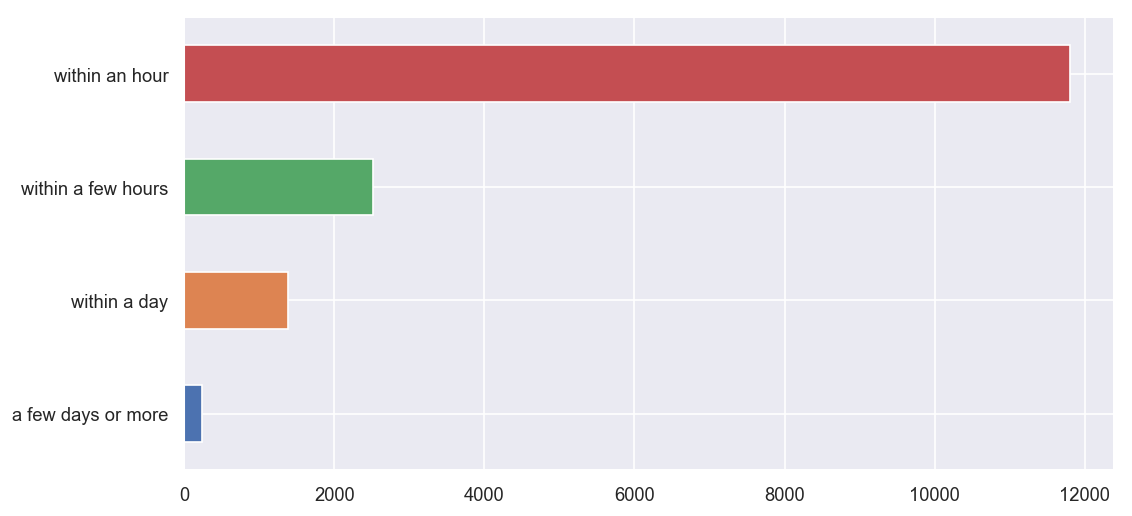

In [6]:
fig=plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
abb['host_response_time'].value_counts().sort_values(ascending=True).plot.barh()

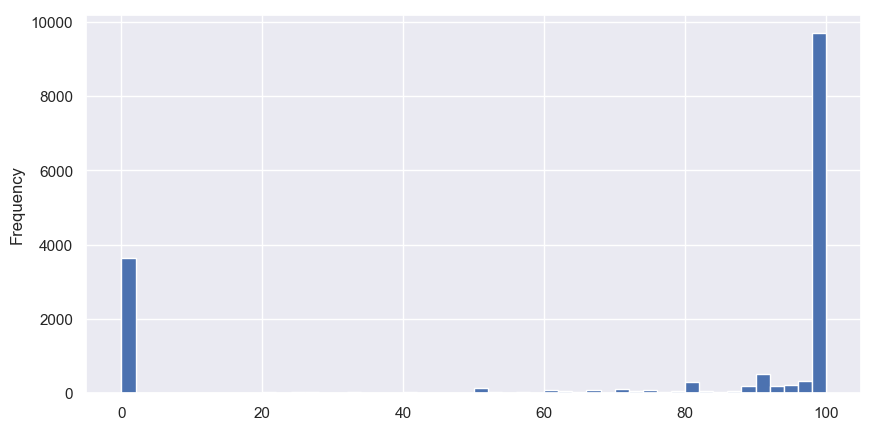

In [6]:
fig=plt.figure(figsize=(10, 5), dpi=100)
abb['host_response_rate'].plot.hist(bins=50)

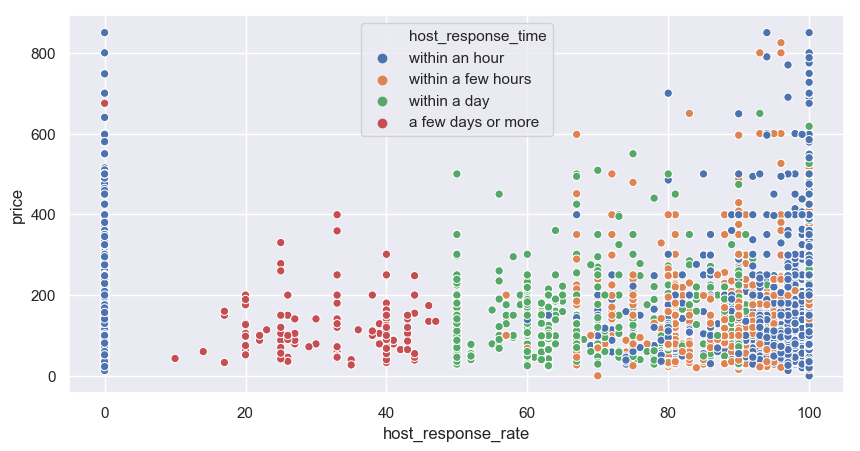

In [36]:
fig=plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(y='price', x='host_response_rate', hue='host_response_time', data=abb)

Text(0.5,0,'Price')

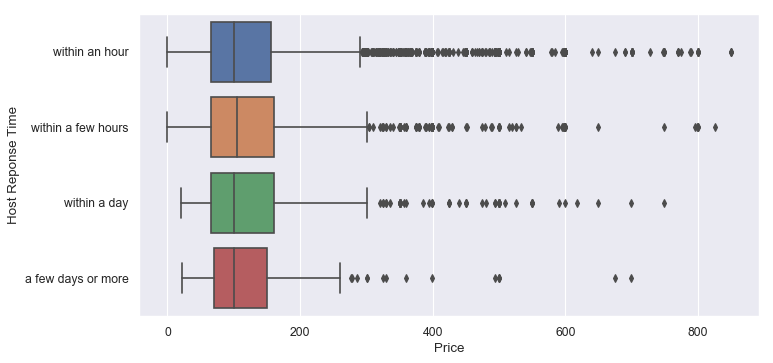

In [10]:
fig=plt.figure(figsize=(10, 5), dpi=80)
sns.boxplot(x='price', y='host_response_time', data=abb)
plt.ylabel("Host Reponse Time")
plt.xlabel("Price")

### Analyzing Superhosts

Text(0,0.5,'Is Host Superhost?')

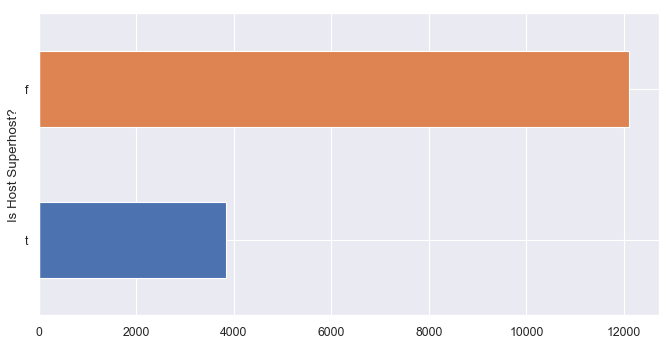

In [15]:
fig=plt.figure(figsize=(10, 5), dpi=80)
abb['host_is_superhost'].value_counts().sort_values(ascending=True).plot.barh()
plt.ylabel("Is Host Superhost?")

Text(0.5,0,'Price')

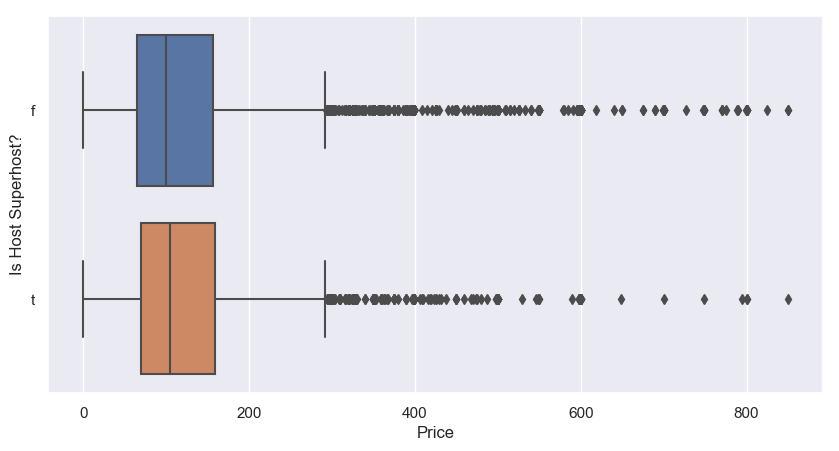

In [18]:
fig=plt.figure(figsize=(10, 5), dpi=100)
sns.boxplot(x='price', y='host_is_superhost', data=abb)
plt.ylabel("Is Host Superhost?")
plt.xlabel("Price")

### Analyzing property, room, bed types

Text(0,0.5,'')

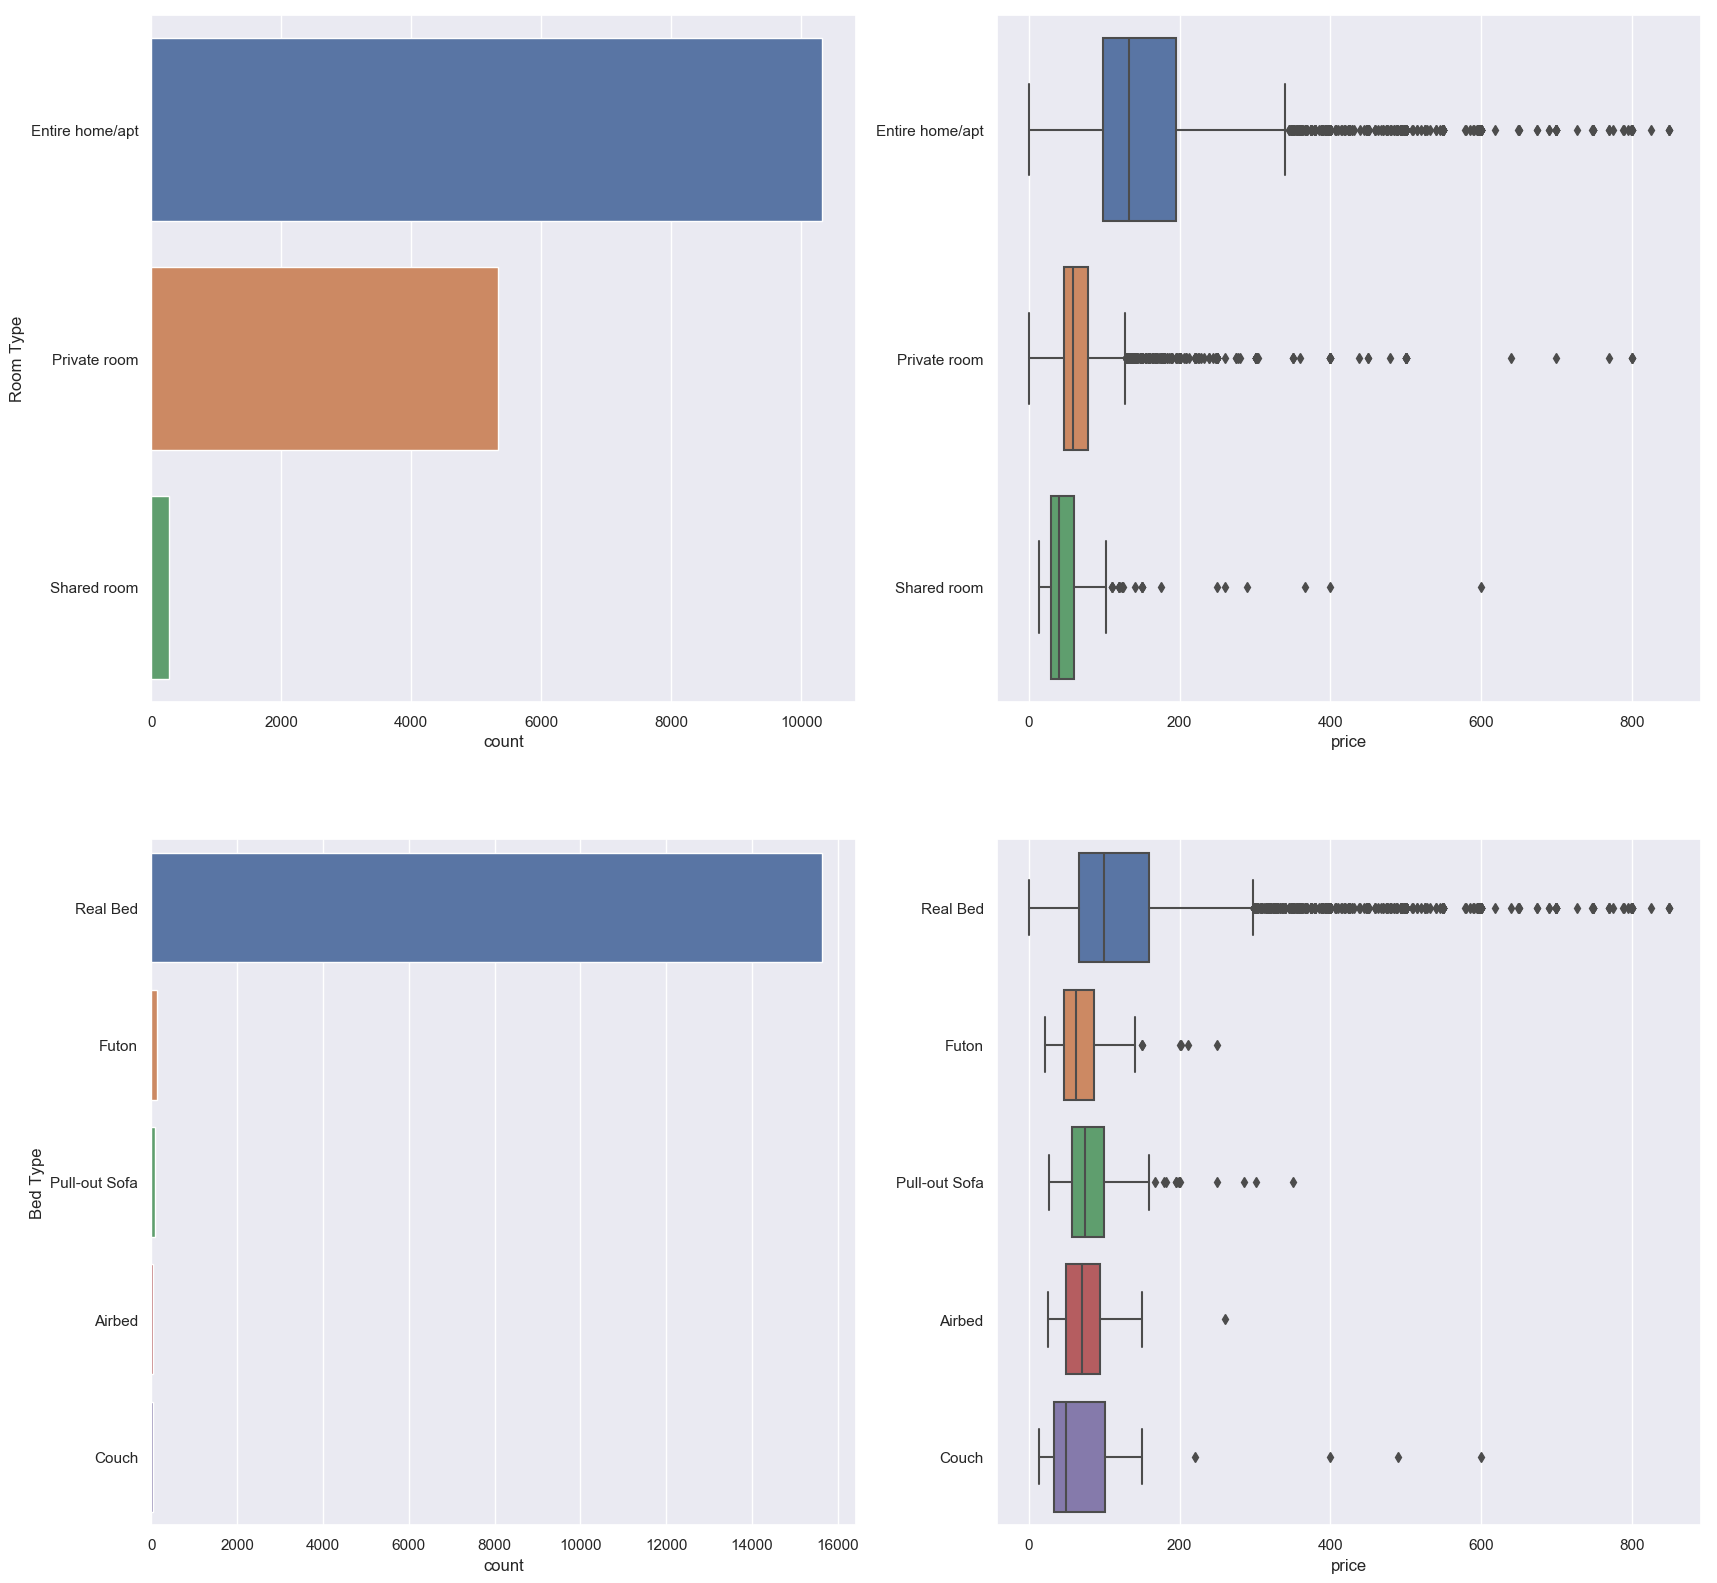

In [20]:
fig=plt.figure(figsize=(20, 20), dpi=100)

plt.subplot(2, 2, 1)
sns.countplot(y='room_type', data=abb, order=abb['room_type'].value_counts().index)
plt.ylabel("Room Type")
plt.subplot(2, 2, 2)
sns.boxplot(x='price', y='room_type', hue_order = ['Shared room', 'Private room', 'Entire home/apt'], data=abb,
           order=abb['room_type'].value_counts().index)
plt.ylabel("")

plt.subplot(2, 2, 3)
sns.countplot(y='bed_type', data=abb,
             order=abb['bed_type'].value_counts().index)
plt.ylabel("Bed Type")
plt.subplot(2, 2, 4)
sns.boxplot(x='price', y='bed_type', data=abb, order=abb['bed_type'].value_counts().index)
plt.ylabel("")

Text(0,0.5,'Property Type')

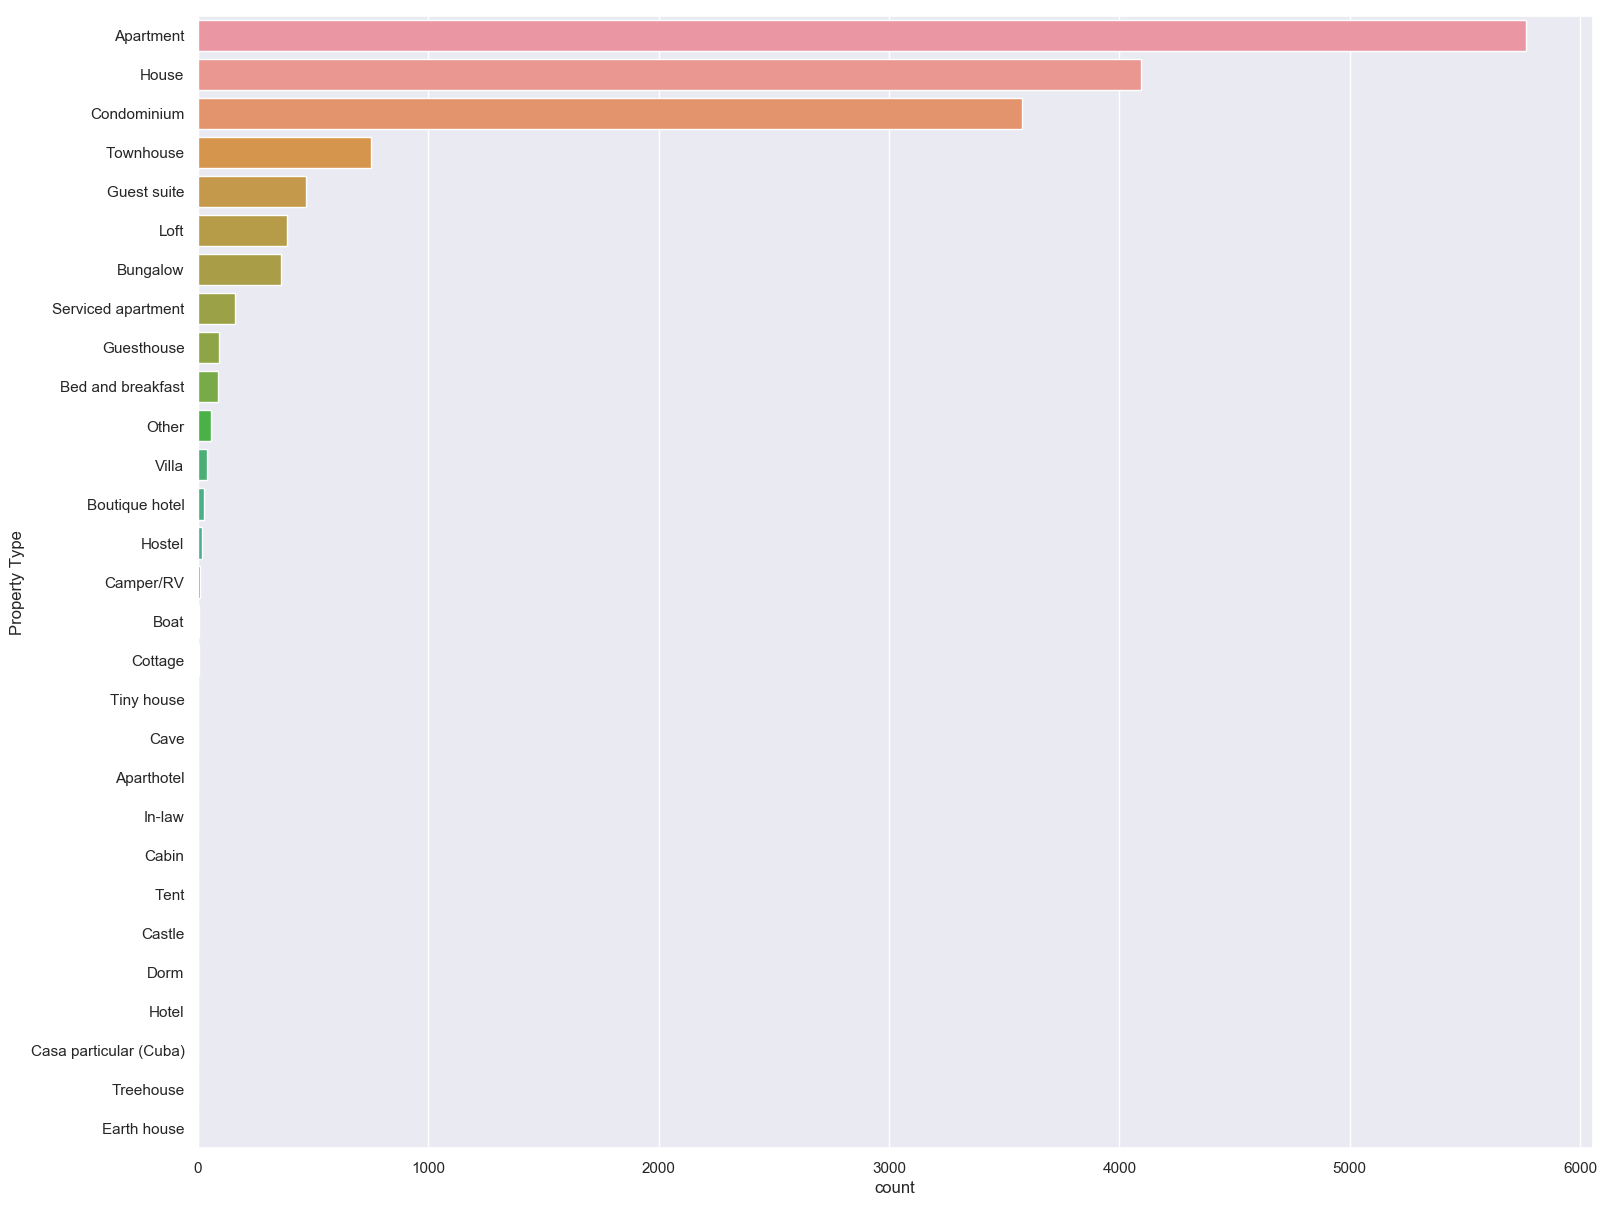

In [69]:
fig=plt.figure(figsize=(18, 15), dpi=100)
sns.countplot(y='property_type', data=abb, order=abb['property_type'].value_counts().index)
plt.ylabel("Property Type")

Text(0,0.5,'')

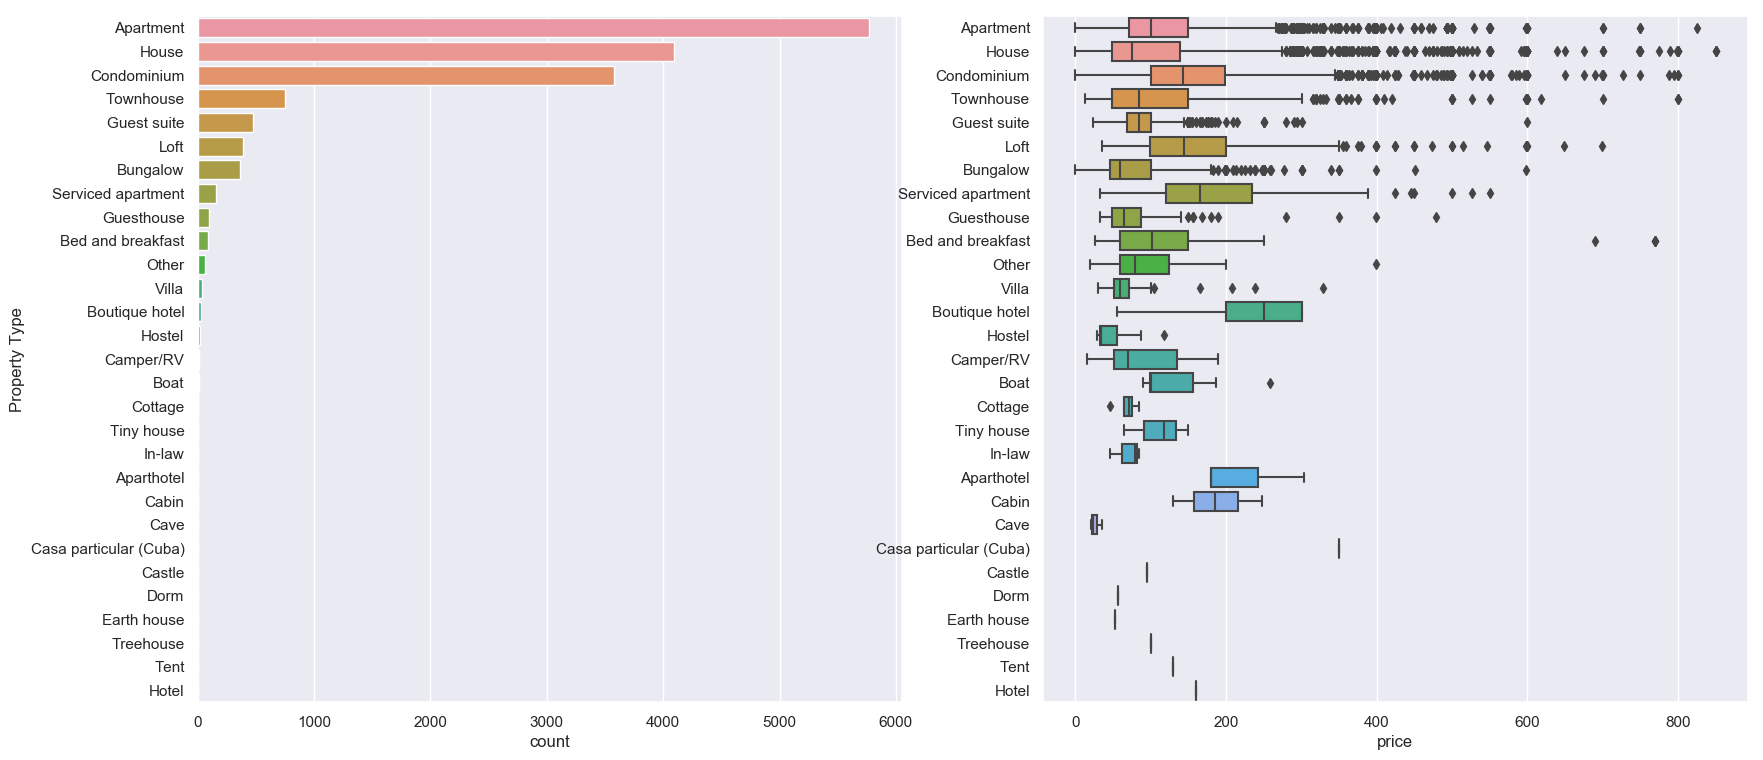

In [39]:
fig=plt.figure(figsize=(20, 20), dpi=100)

plt.subplot(2, 2, 1)
sns.countplot(y='property_type', data=abb, order=abb['property_type'].value_counts().index)
plt.ylabel("Property Type")
plt.subplot(2, 2, 2)
sns.boxplot(x='price', y='property_type', data=abb,
           order=abb['property_type'].value_counts().index)
plt.ylabel("")

<Figure size 2000x3000 with 0 Axes>

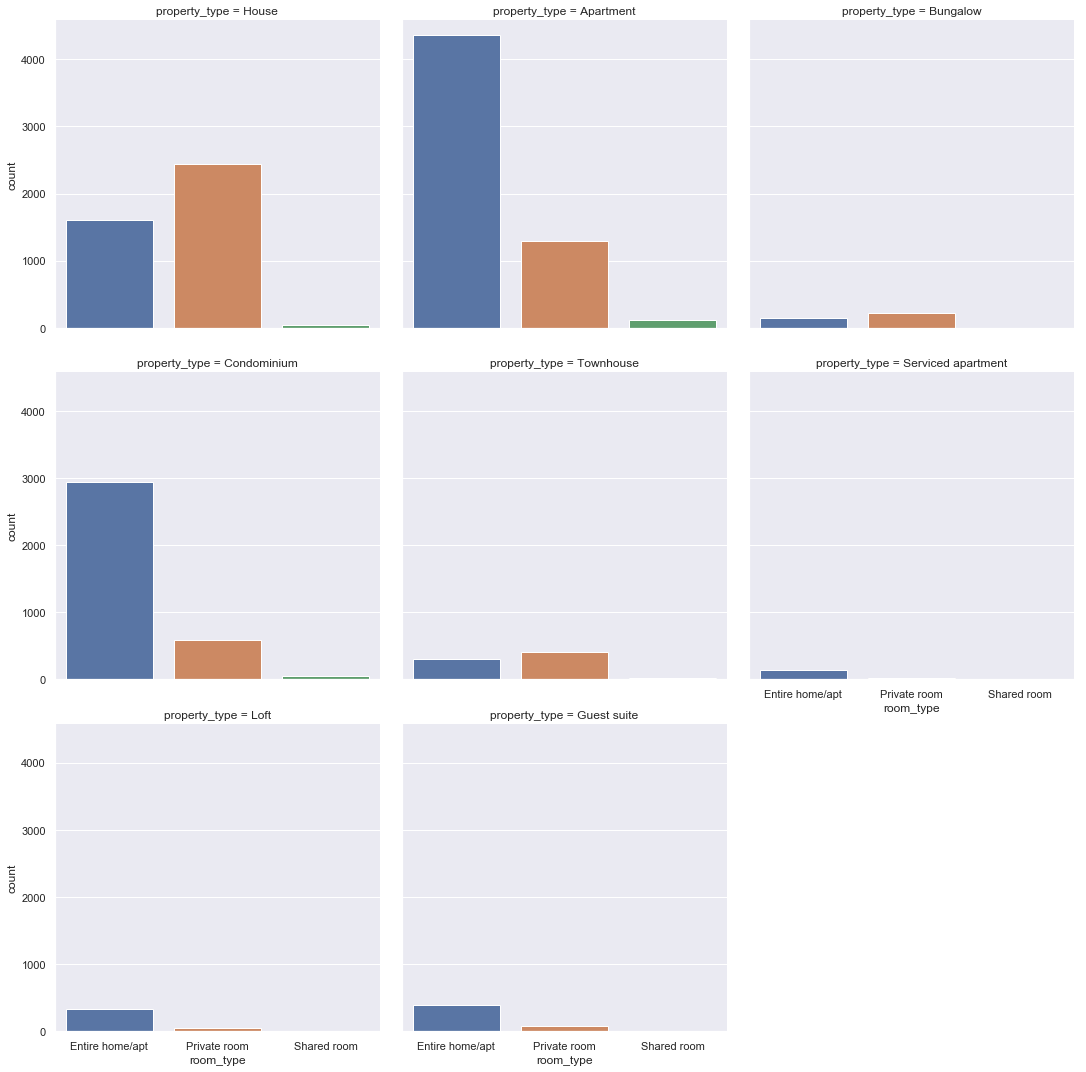

In [75]:
fig=plt.figure(figsize=(20, 30), dpi=100)
abb_common_props = abb[abb['property_type'].isin(['Apartment', 'House', 'Condominium', 'Townhouse', 
                                                  'Guest suite', 'Loft', 'Bungalow', 'Serviced apartment'])]
sns.catplot(x="room_type", col="property_type", col_wrap=3,
           data=abb_common_props, kind='count')


### Comparing number of bathrooms, bedrooms, beds

Text(0,0.5,'')

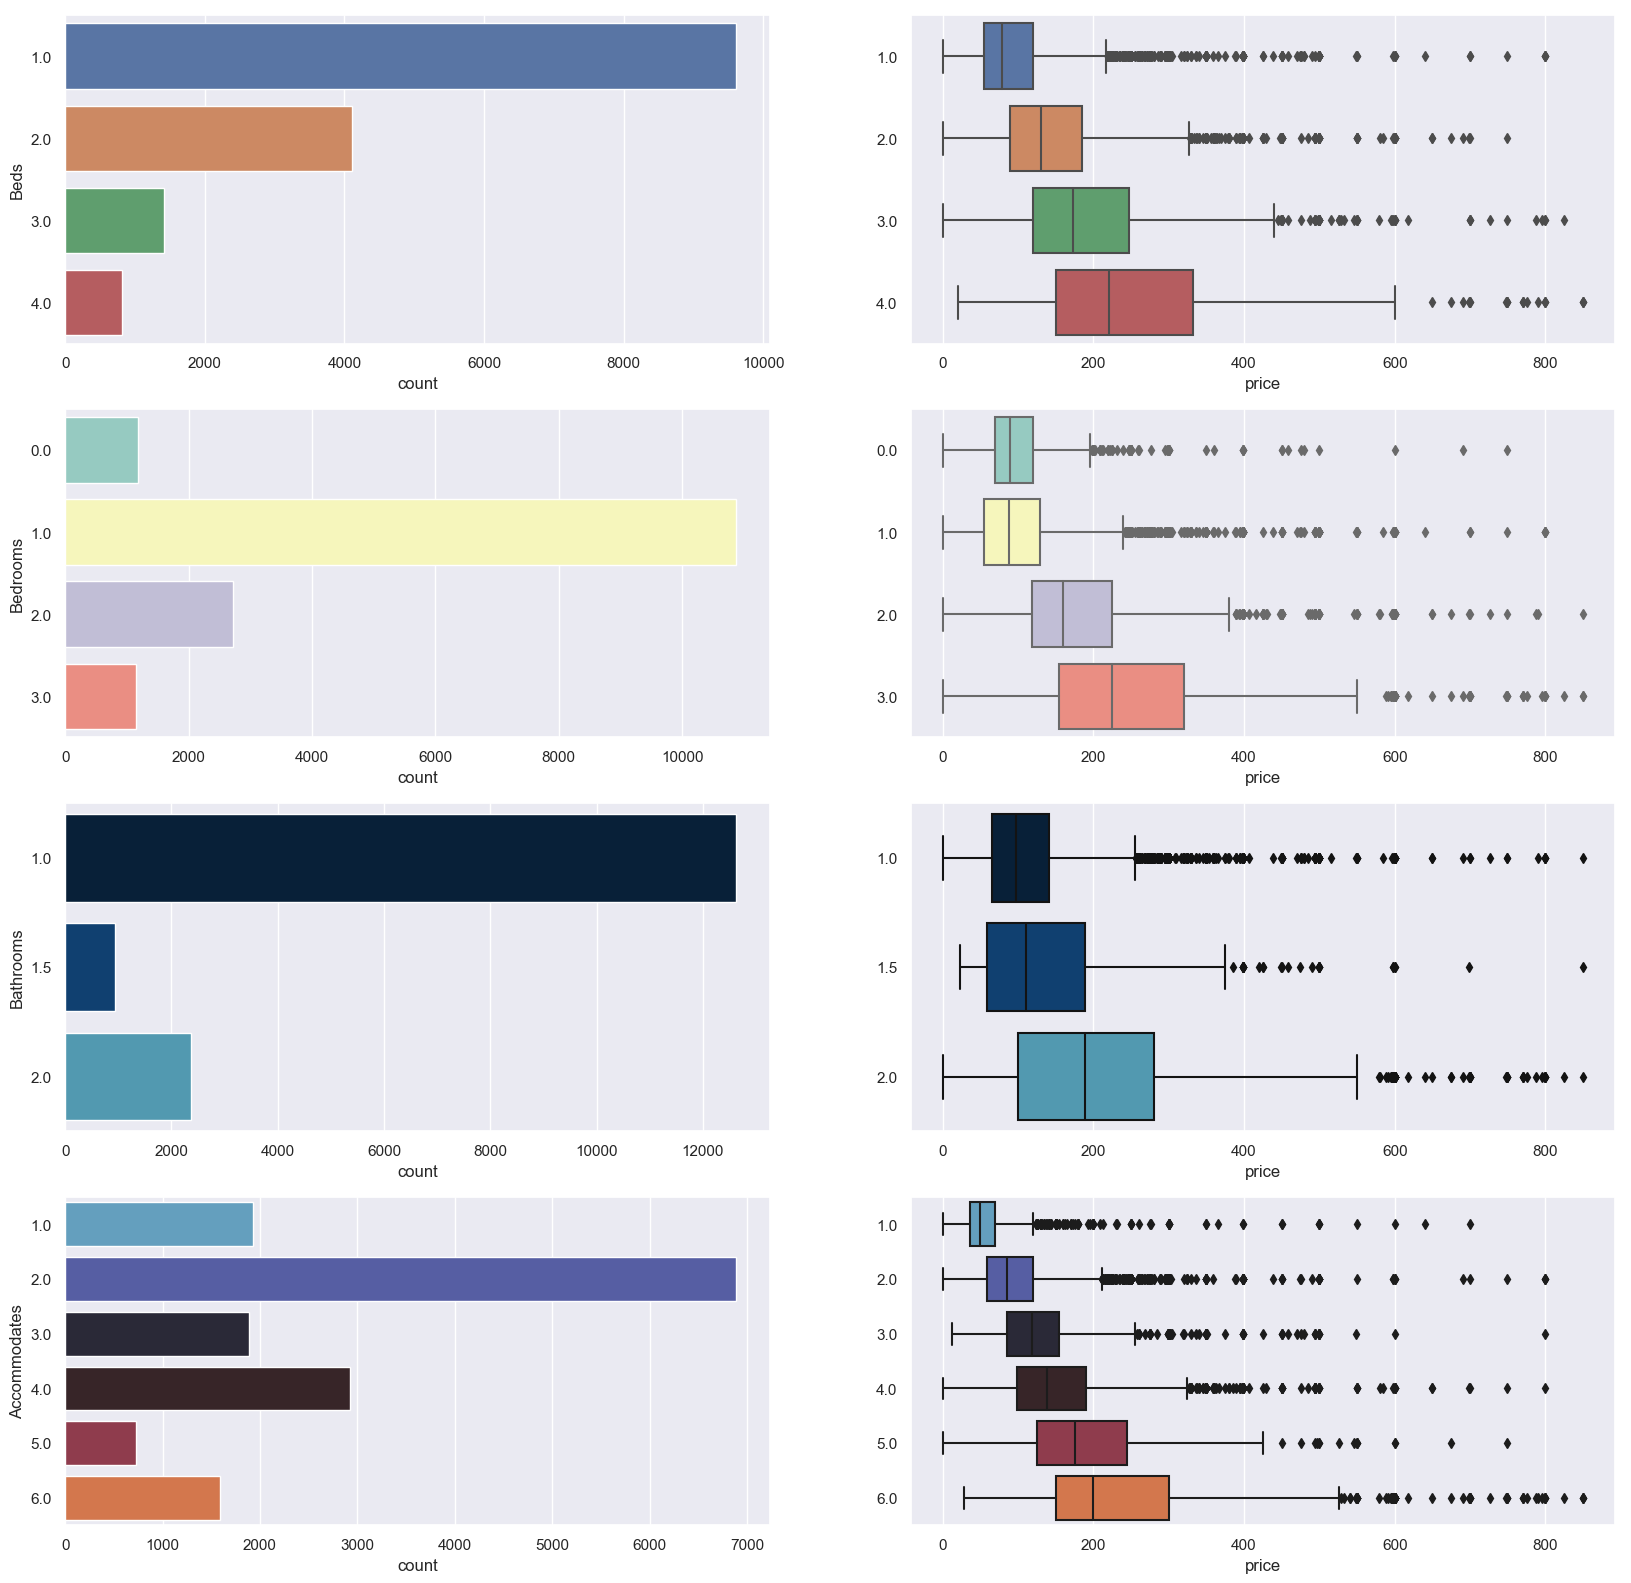

In [113]:
fig=plt.figure(figsize=(20, 20), dpi=100)

plt.subplot(4, 2, 1)
sns.countplot(y='beds', data=abb, order=abb['beds'].value_counts().index)
plt.ylabel("Beds")
plt.subplot(4, 2, 2)
sns.boxplot(y='beds', x='price', data=abb, orient='h')
plt.ylabel("")

plt.subplot(4, 2, 3)
sns.countplot(y='bedrooms', data=abb, palette='Set3')
plt.ylabel("Bedrooms")
plt.subplot(4, 2, 4)
sns.boxplot(y='bedrooms', x='price', data=abb, orient='h', palette='Set3')
plt.ylabel("")

plt.subplot(4, 2, 5)
sns.countplot(y='bathrooms', data=abb, palette='ocean')
plt.ylabel("Bathrooms")
plt.subplot(4, 2, 6)
sns.boxplot(y='bathrooms', x='price', data=abb, orient='h', palette='ocean')
plt.ylabel("")

plt.subplot(4, 2, 7)
sns.countplot(y='accommodates', data=abb, palette='icefire')
plt.ylabel("Accommodates")
plt.subplot(4, 2, 8)
sns.boxplot(y='accommodates', x='price', data=abb, orient='h', palette='icefire')
plt.ylabel("")

### Analyzing Cost Metrics

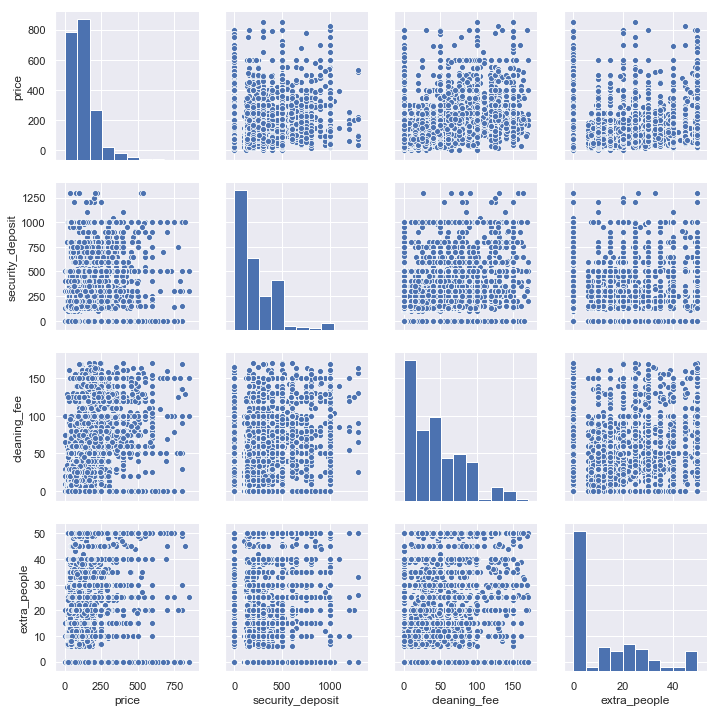

In [119]:
sns.pairplot(abb, vars=['price', 'security_deposit', 'cleaning_fee', 'extra_people'])

<Figure size 1000x1000 with 0 Axes>

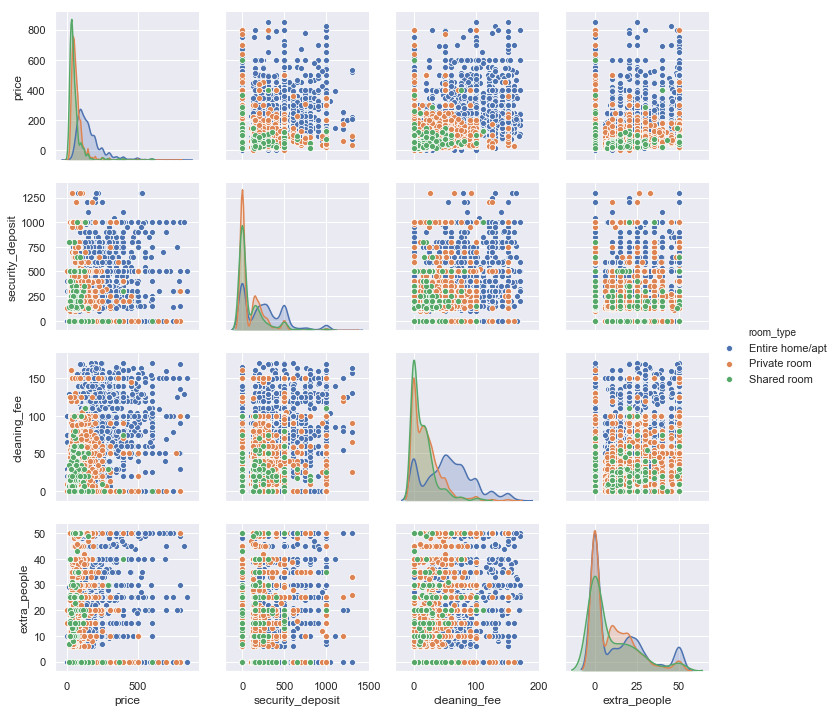

In [124]:
fig=plt.figure(figsize=(10, 10), dpi=100)
sns.pairplot(abb, vars=['price', 'security_deposit', 'cleaning_fee', 'extra_people'], hue='room_type')

### Neighborhood and Price

Text(0,0.5,'')

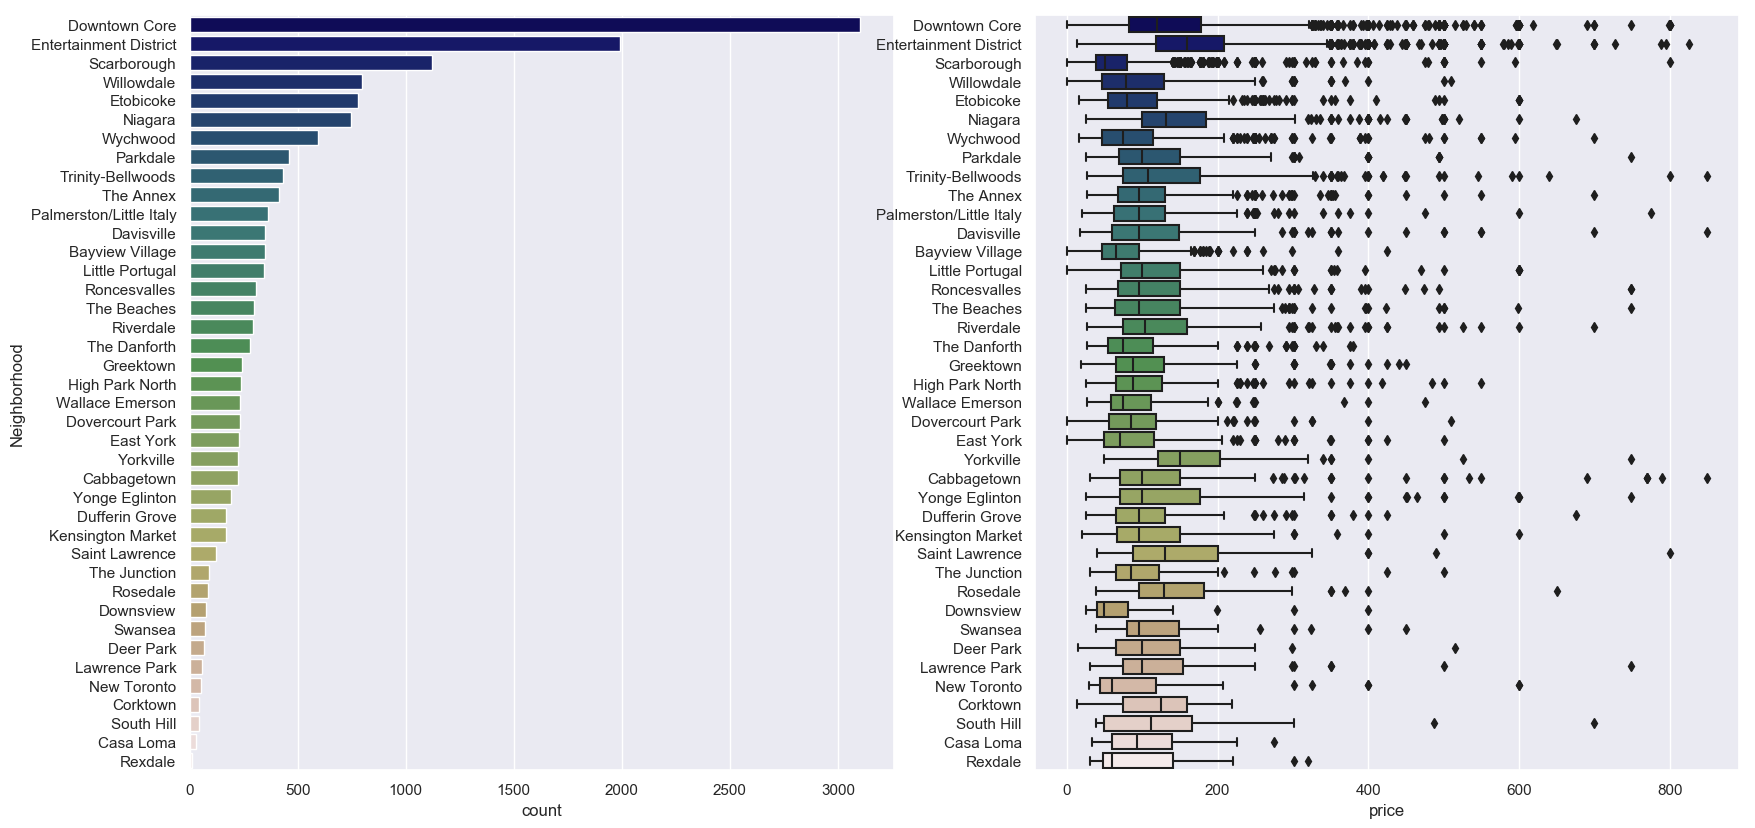

In [136]:
fig=plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(1, 2, 1)
sns.countplot(y='neighborhood', data=abb, palette='gist_earth', order=abb['neighborhood'].value_counts().index)
plt.ylabel("Neighborhood")
plt.subplot(1, 2, 2)
sns.boxplot(y='neighborhood', x='price', data=abb, orient='h', palette='gist_earth', order=abb['neighborhood'].value_counts().index)
plt.ylabel("")

Text(0,0.5,'')

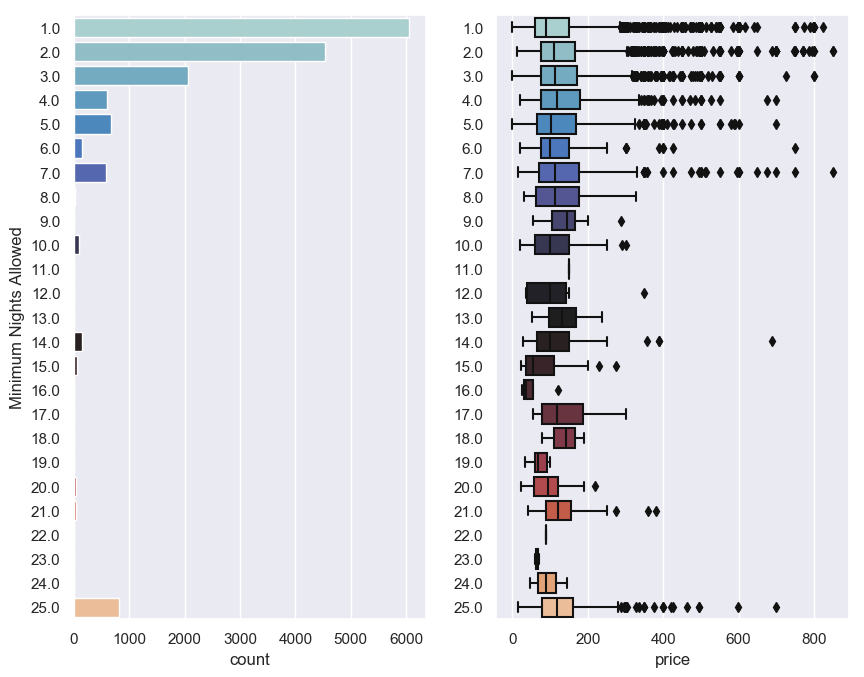

In [140]:
fig=plt.figure(figsize=(10, 8), dpi=100)
plt.subplot(1, 2, 1)
sns.countplot(y='minimum_nights', data=abb, palette='icefire')
plt.ylabel("Minimum Nights Allowed")
plt.subplot(1, 2, 2)
sns.boxplot(y='minimum_nights', x='price', data=abb, orient='h', palette='icefire')
plt.ylabel("")

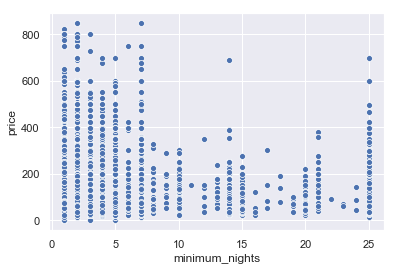

In [142]:
sns.scatterplot(data=abb, y='price', x='minimum_nights')

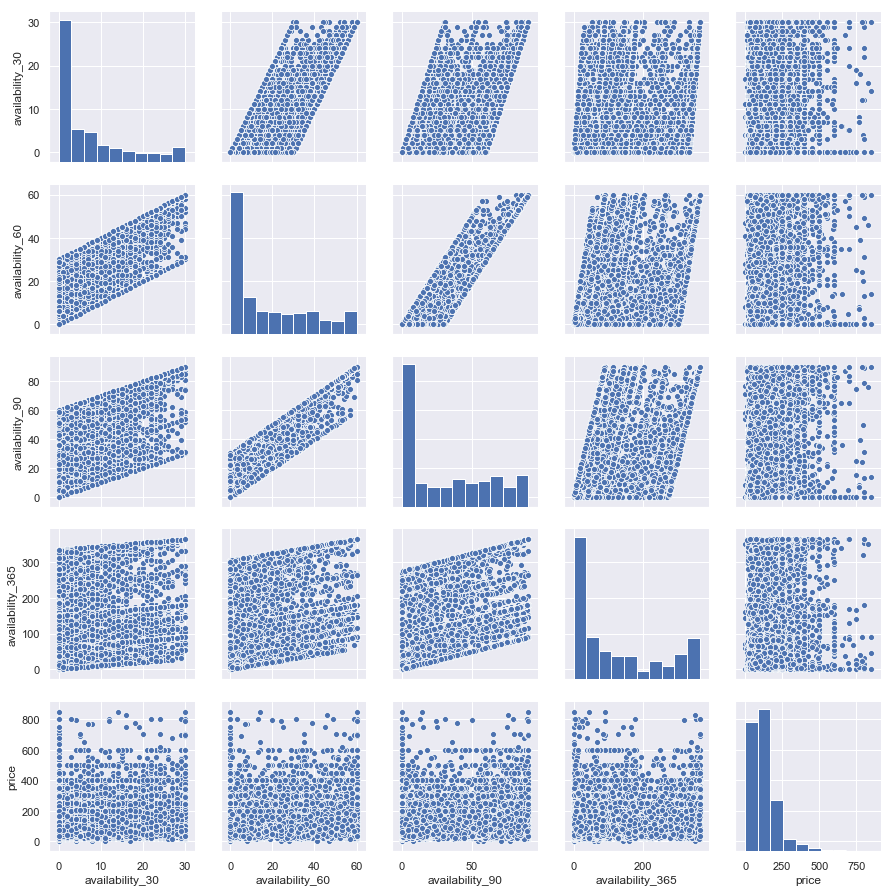

In [38]:
sns.pairplot(data=abb, vars=['availability_30', 'availability_60', 'availability_90', 'availability_365', 'price'])

<IPython.core.display.Javascript object>


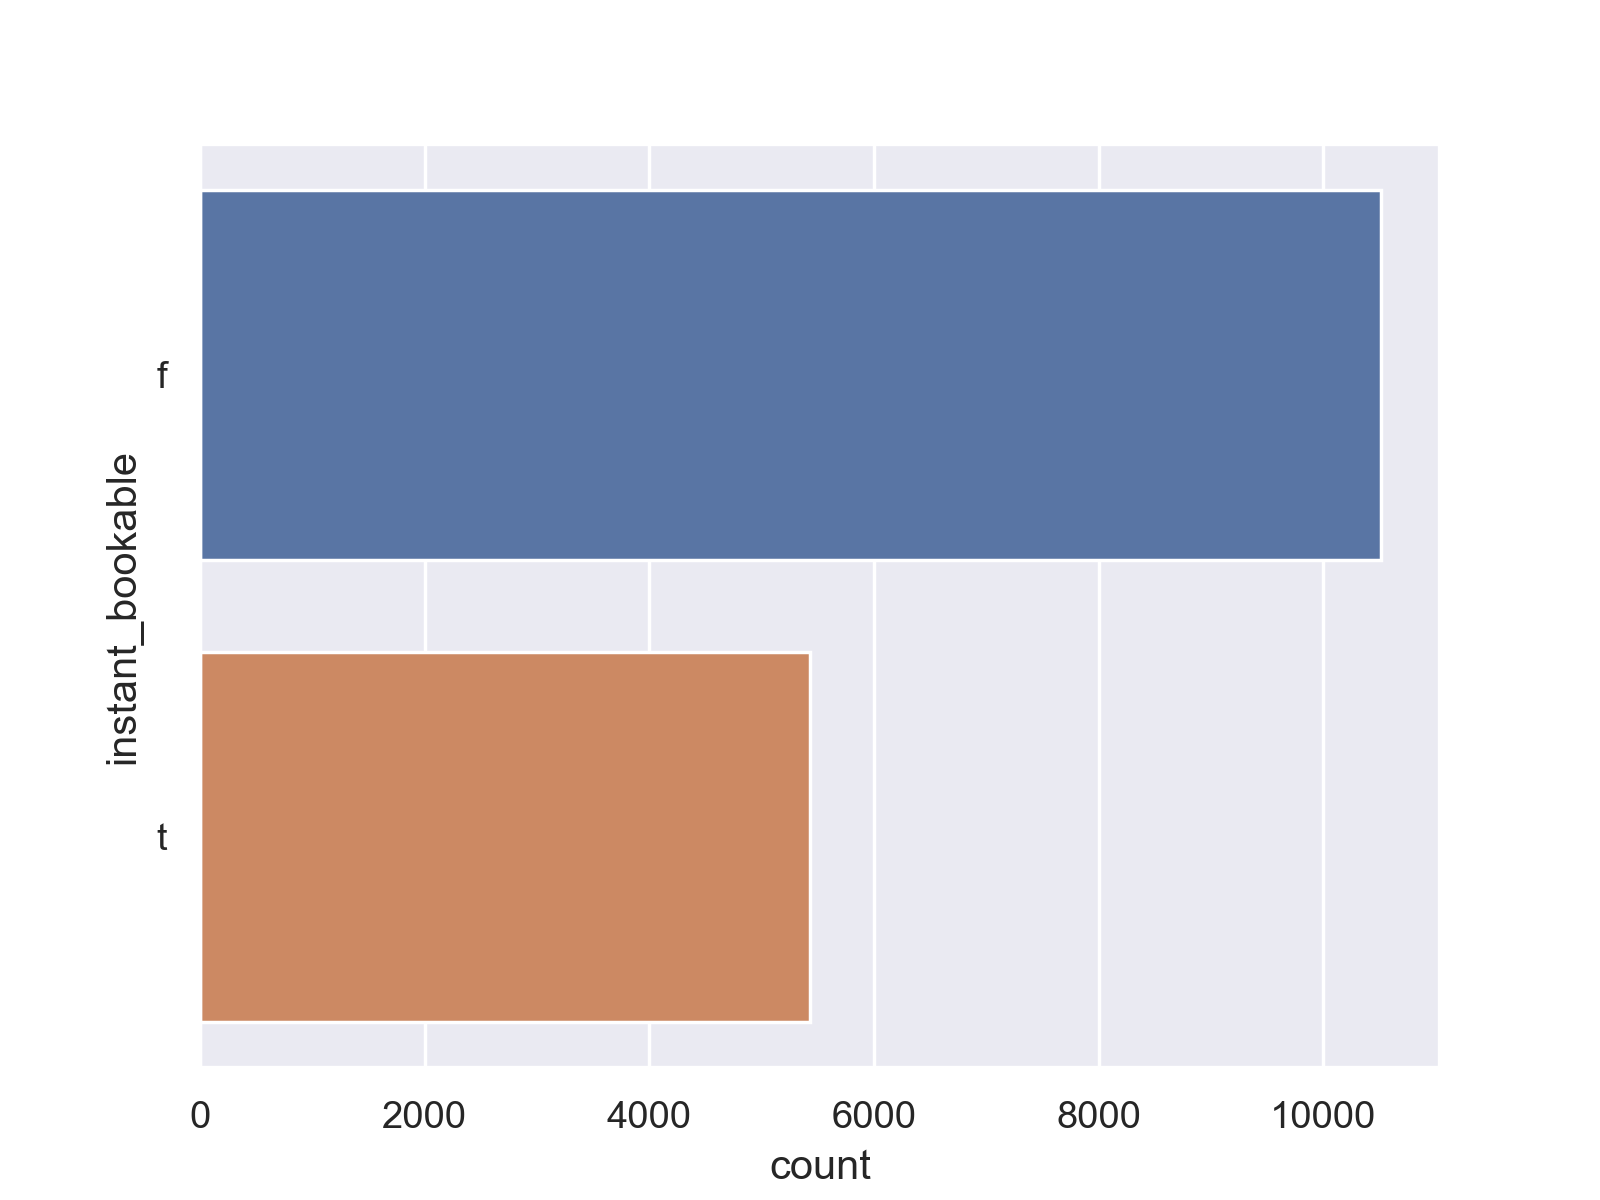

In [172]:
sns.countplot(y='instant_bookable', data=abb)

<IPython.core.display.Javascript object>


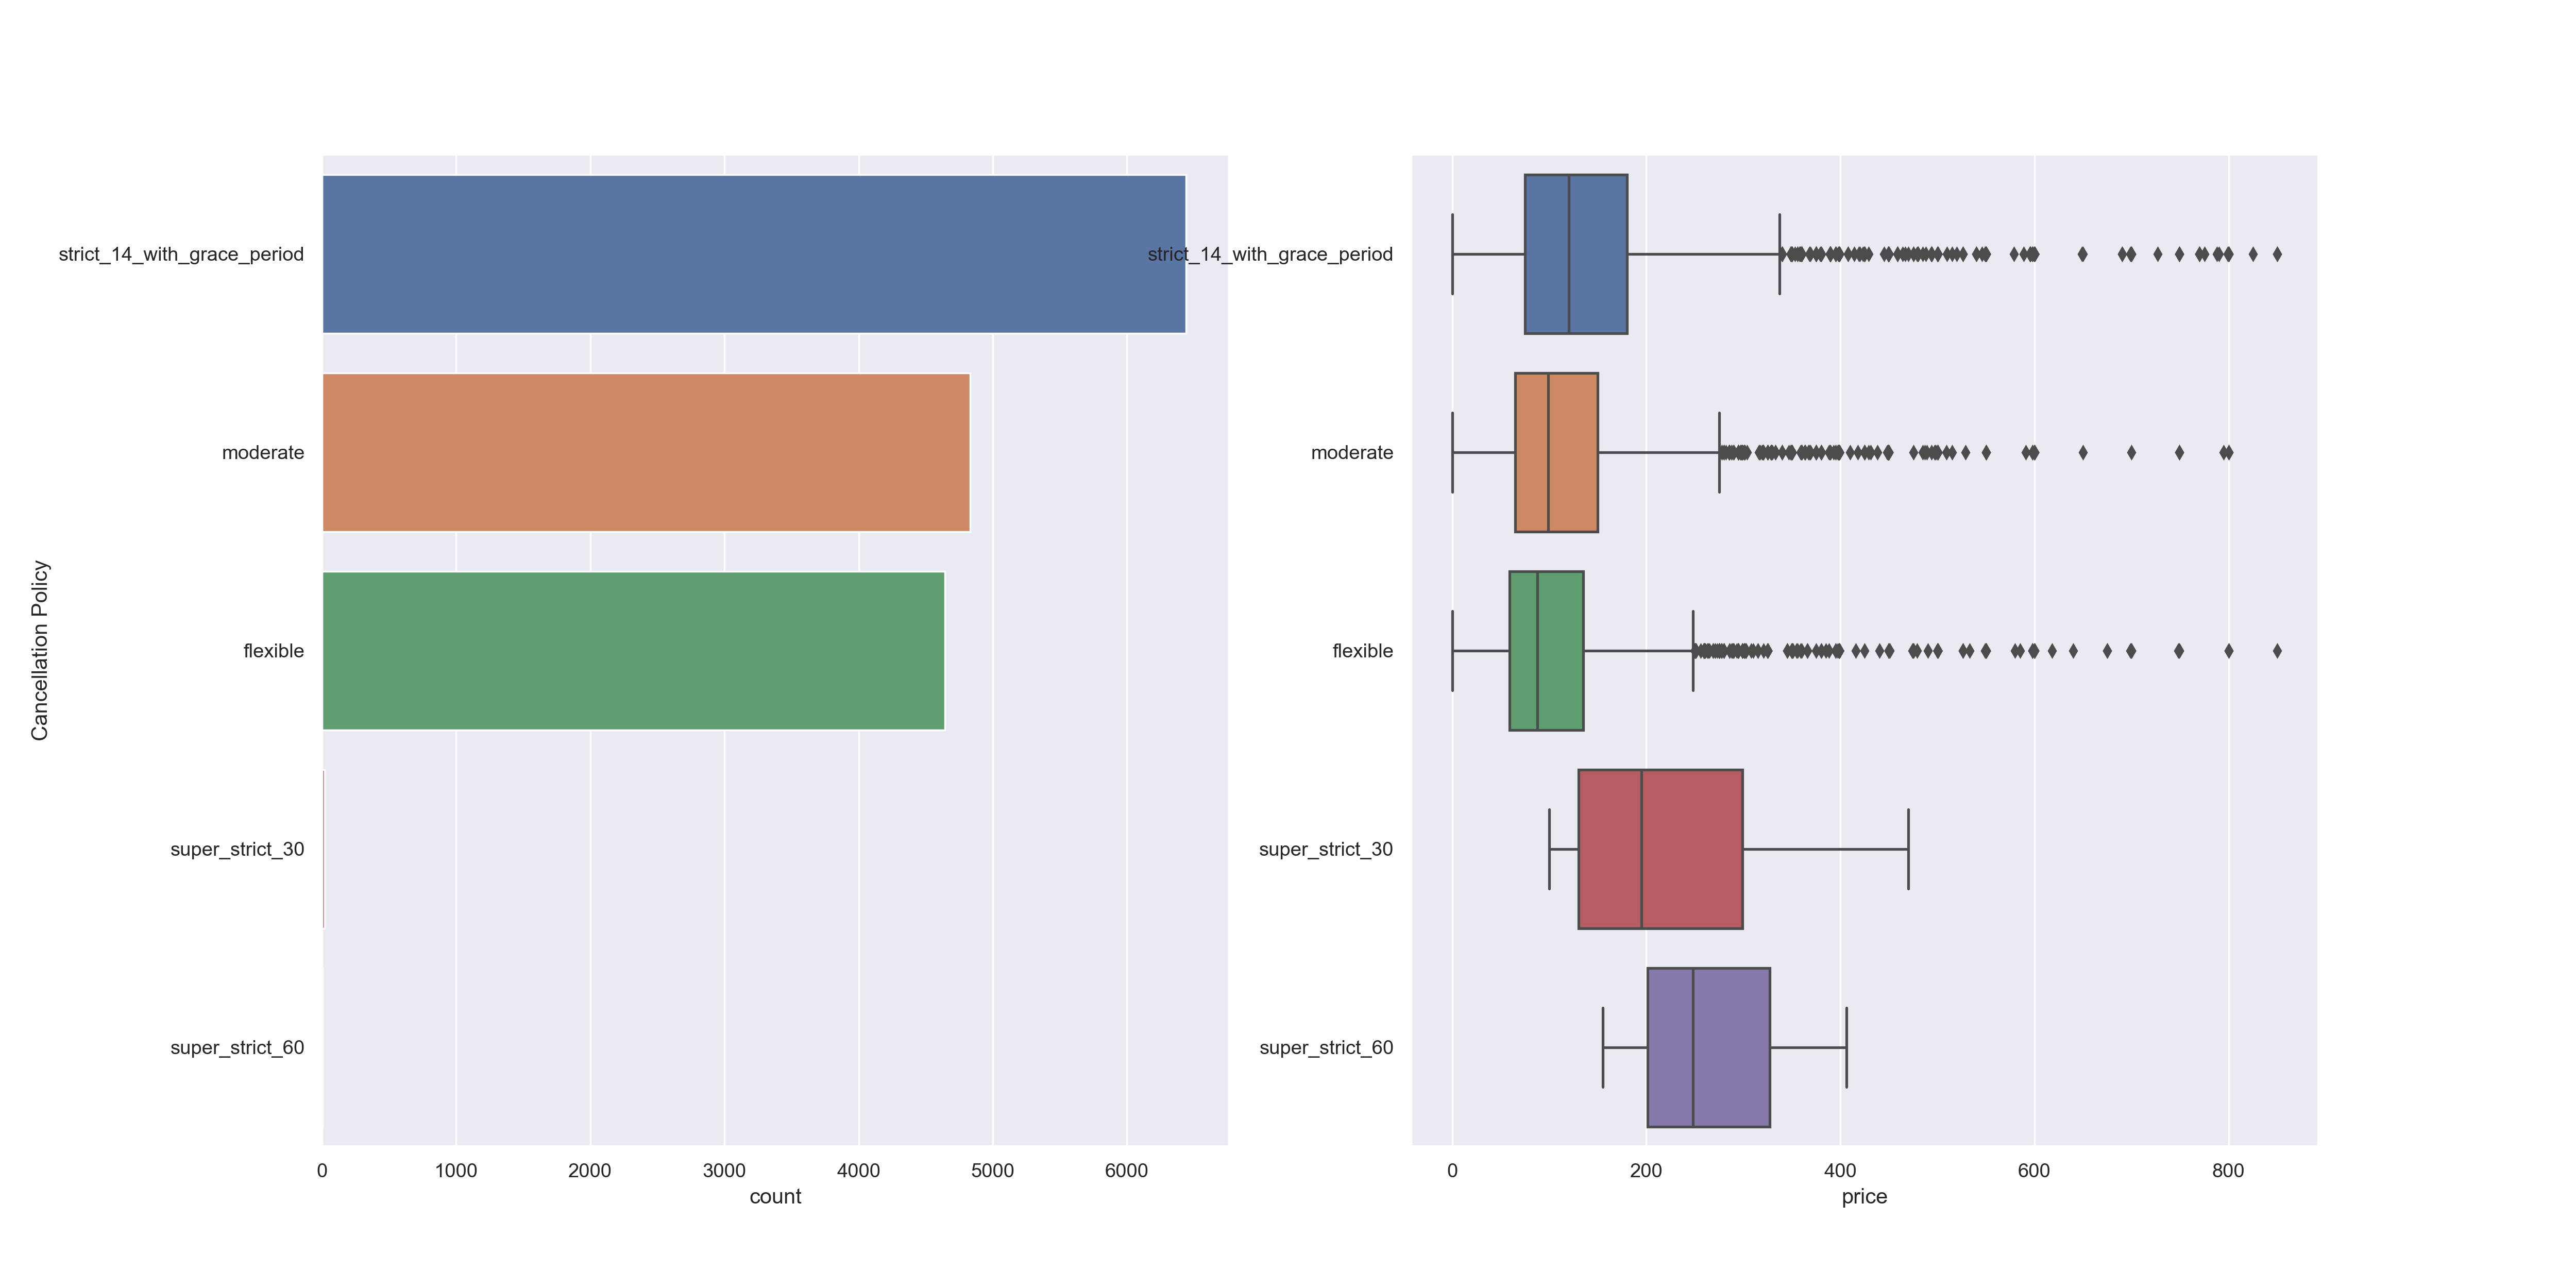

Text(0,0.5,'')

In [175]:
fig=plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(1, 2, 1)
sns.countplot(y='cancellation_policy', data=abb)
plt.ylabel("Cancellation Policy")
plt.subplot(1, 2, 2)
sns.boxplot(y='cancellation_policy', x='price', data=abb, orient='h')
plt.ylabel("")

<IPython.core.display.Javascript object>


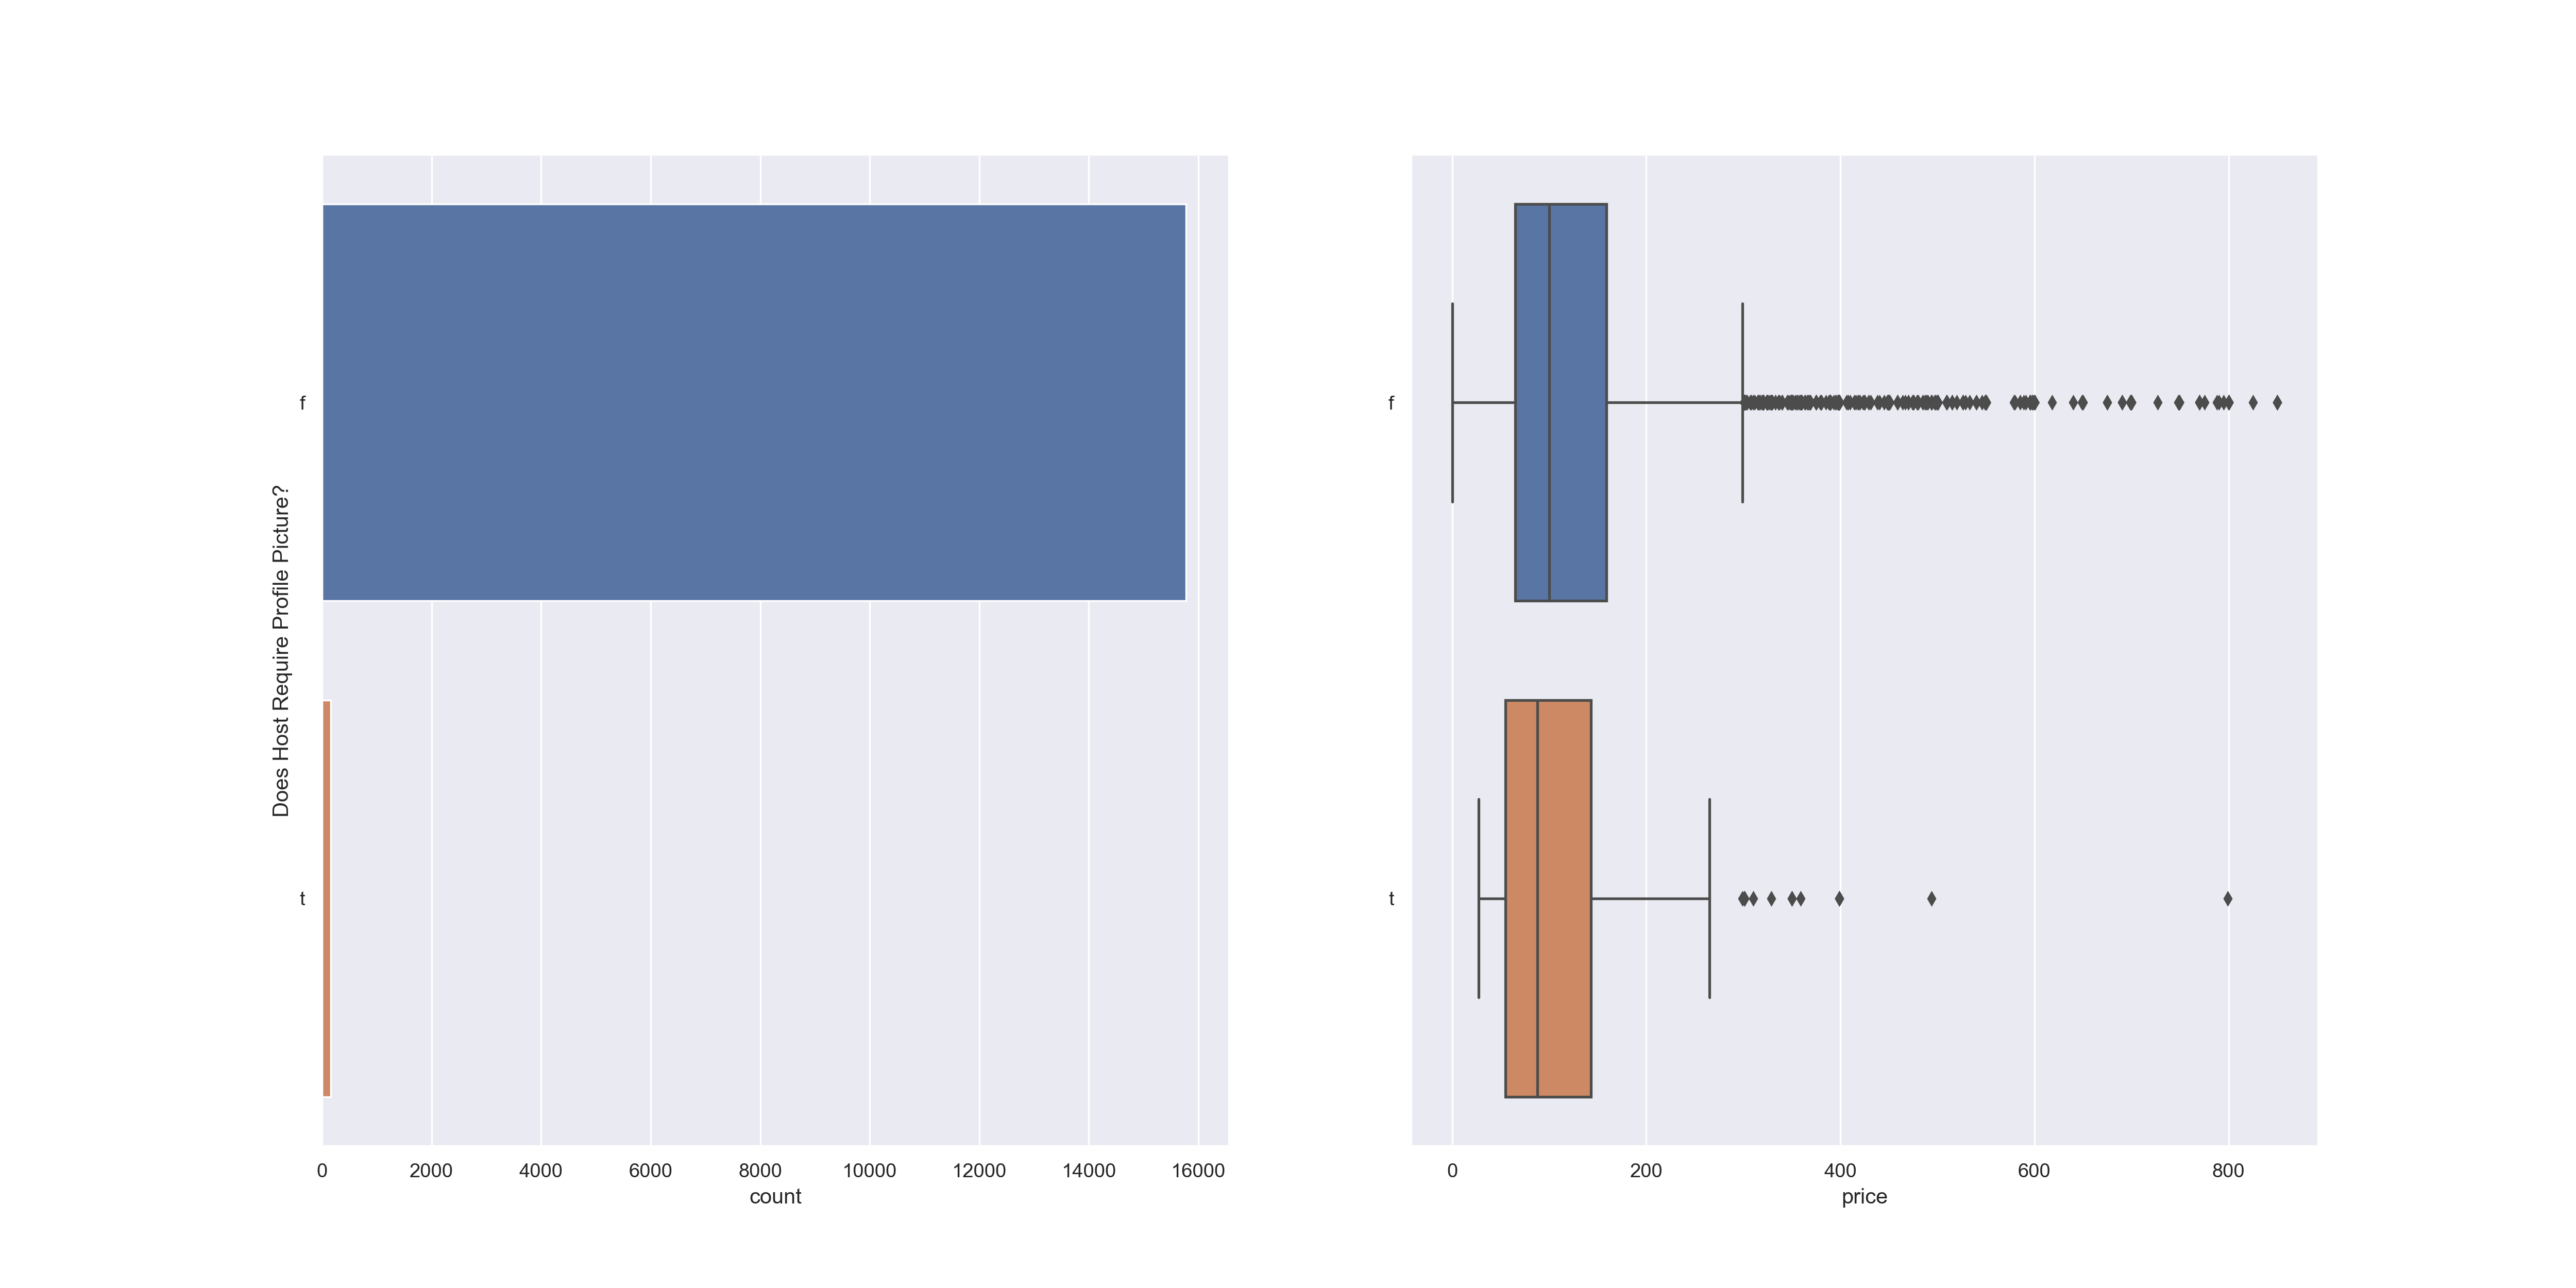

Text(0,0.5,'')

In [176]:
fig=plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(1, 2, 1)
sns.countplot(y='require_guest_profile_picture', data=abb)
plt.ylabel("Does Host Require Profile Picture?")
plt.subplot(1, 2, 2)
sns.boxplot(y='require_guest_profile_picture', x='price', data=abb, orient='h')
plt.ylabel("")

<IPython.core.display.Javascript object>


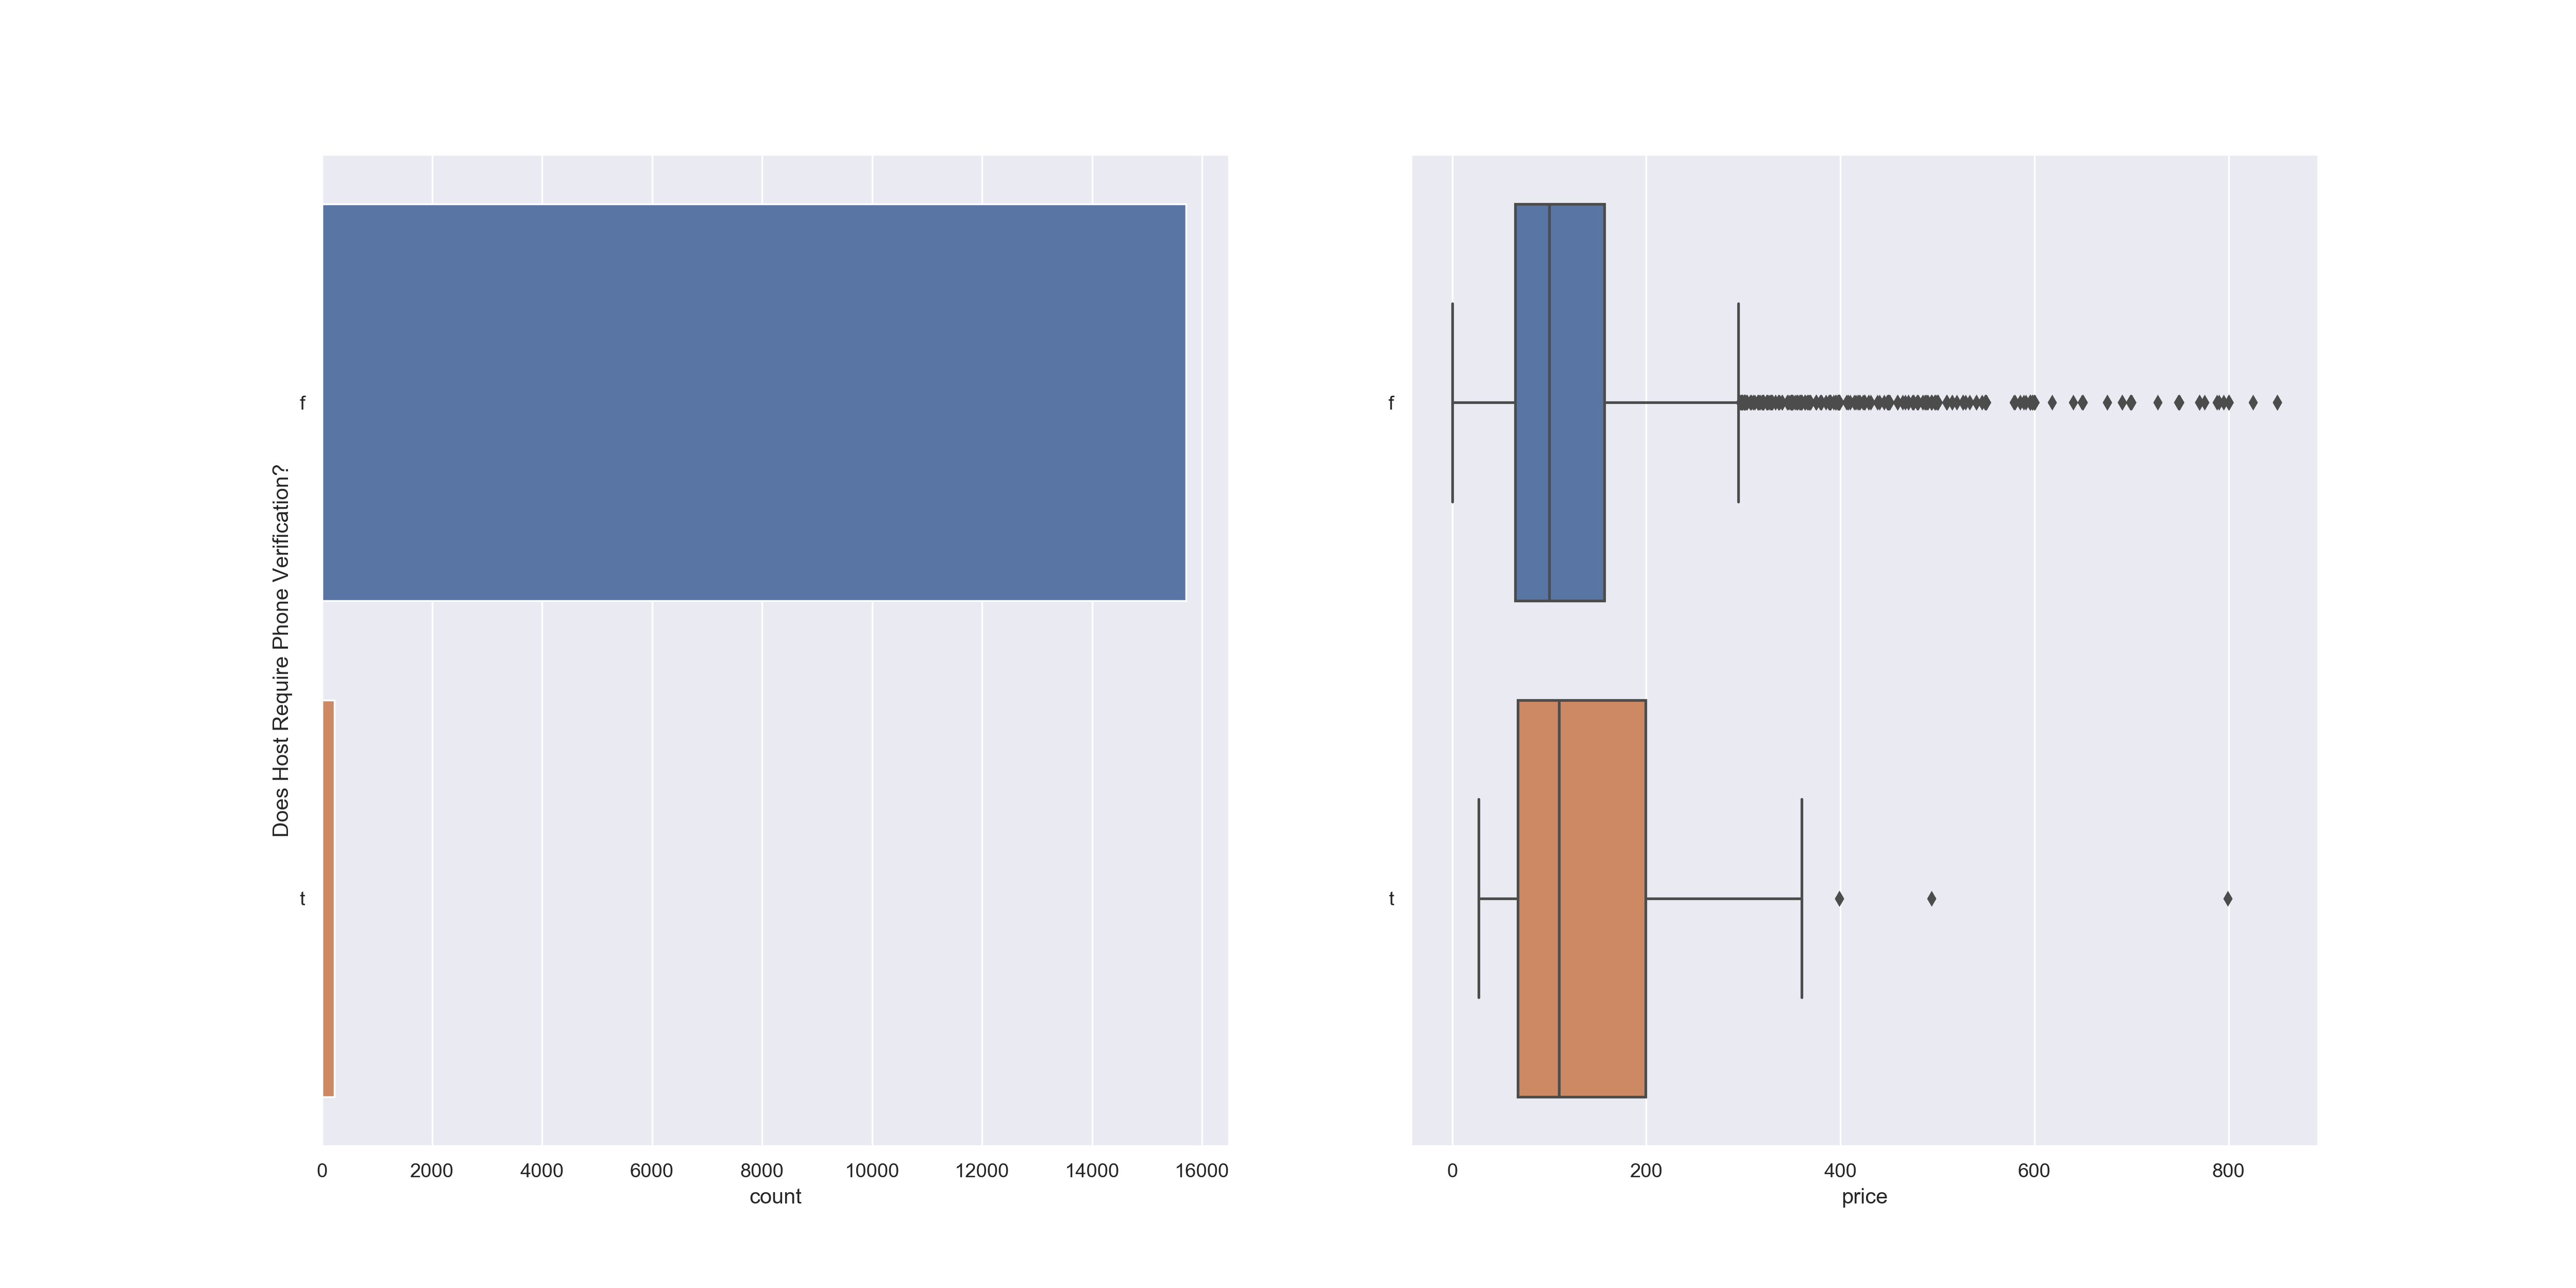

Text(0,0.5,'')

In [179]:
fig=plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(1, 2, 1)
sns.countplot(y='require_guest_phone_verification', data=abb)
plt.ylabel("Does Host Require Phone Verification?")
plt.subplot(1, 2, 2)
sns.boxplot(y='require_guest_phone_verification', x='price', data=abb, orient='h')
plt.ylabel("")

Text(0.5,0,'Reviews per Month')

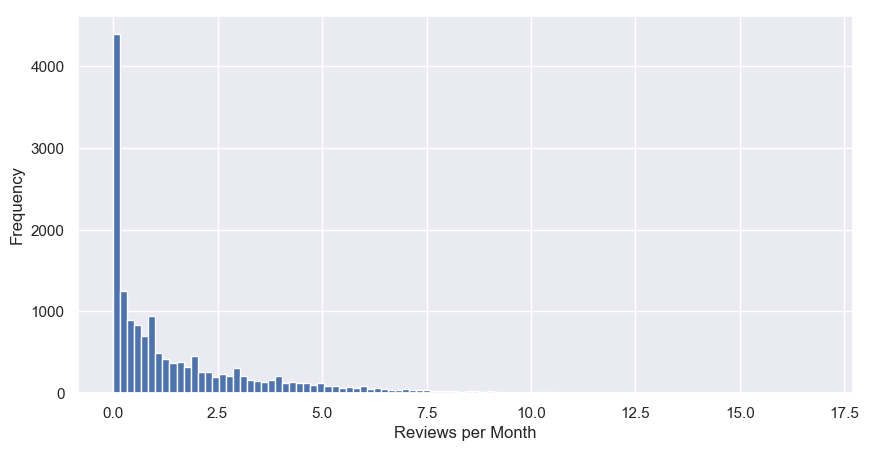

In [37]:
fig=plt.figure(figsize=(10, 5), dpi=100)
abb['reviews_per_month'].plot.hist(bins=100)
plt.xlabel("Reviews per Month")

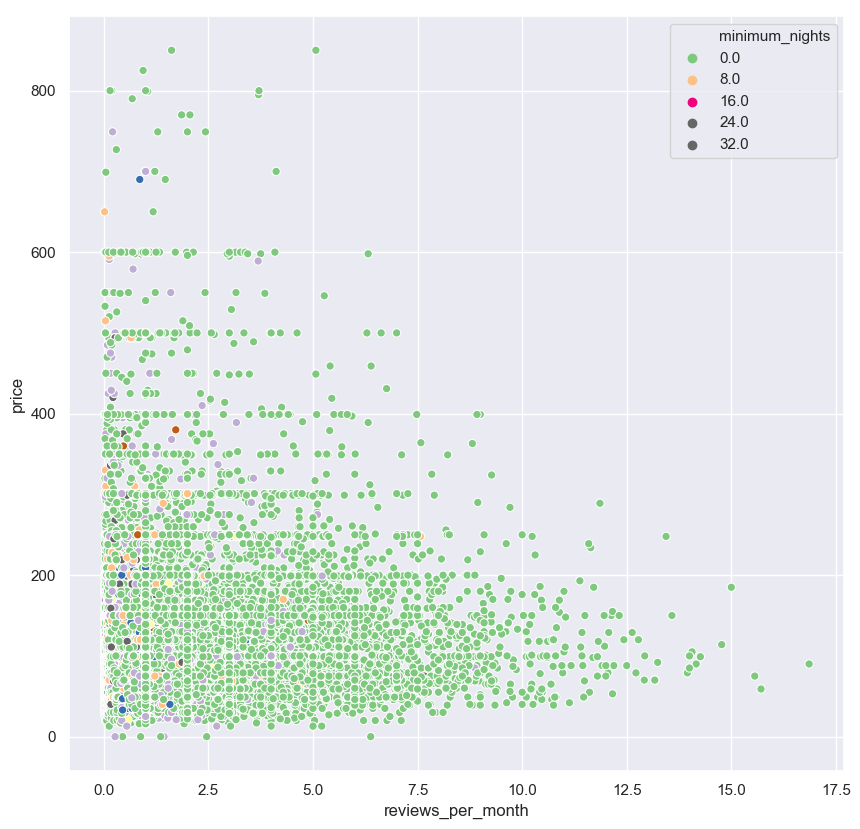

In [35]:
fig=plt.figure(figsize=(10, 10), dpi=100)
sns.scatterplot(y='price', x='reviews_per_month', 
                data=abb.loc[abb['reviews_per_month'] > 0], 
                hue='minimum_nights',
                palette='Accent')

<IPython.core.display.Javascript object>


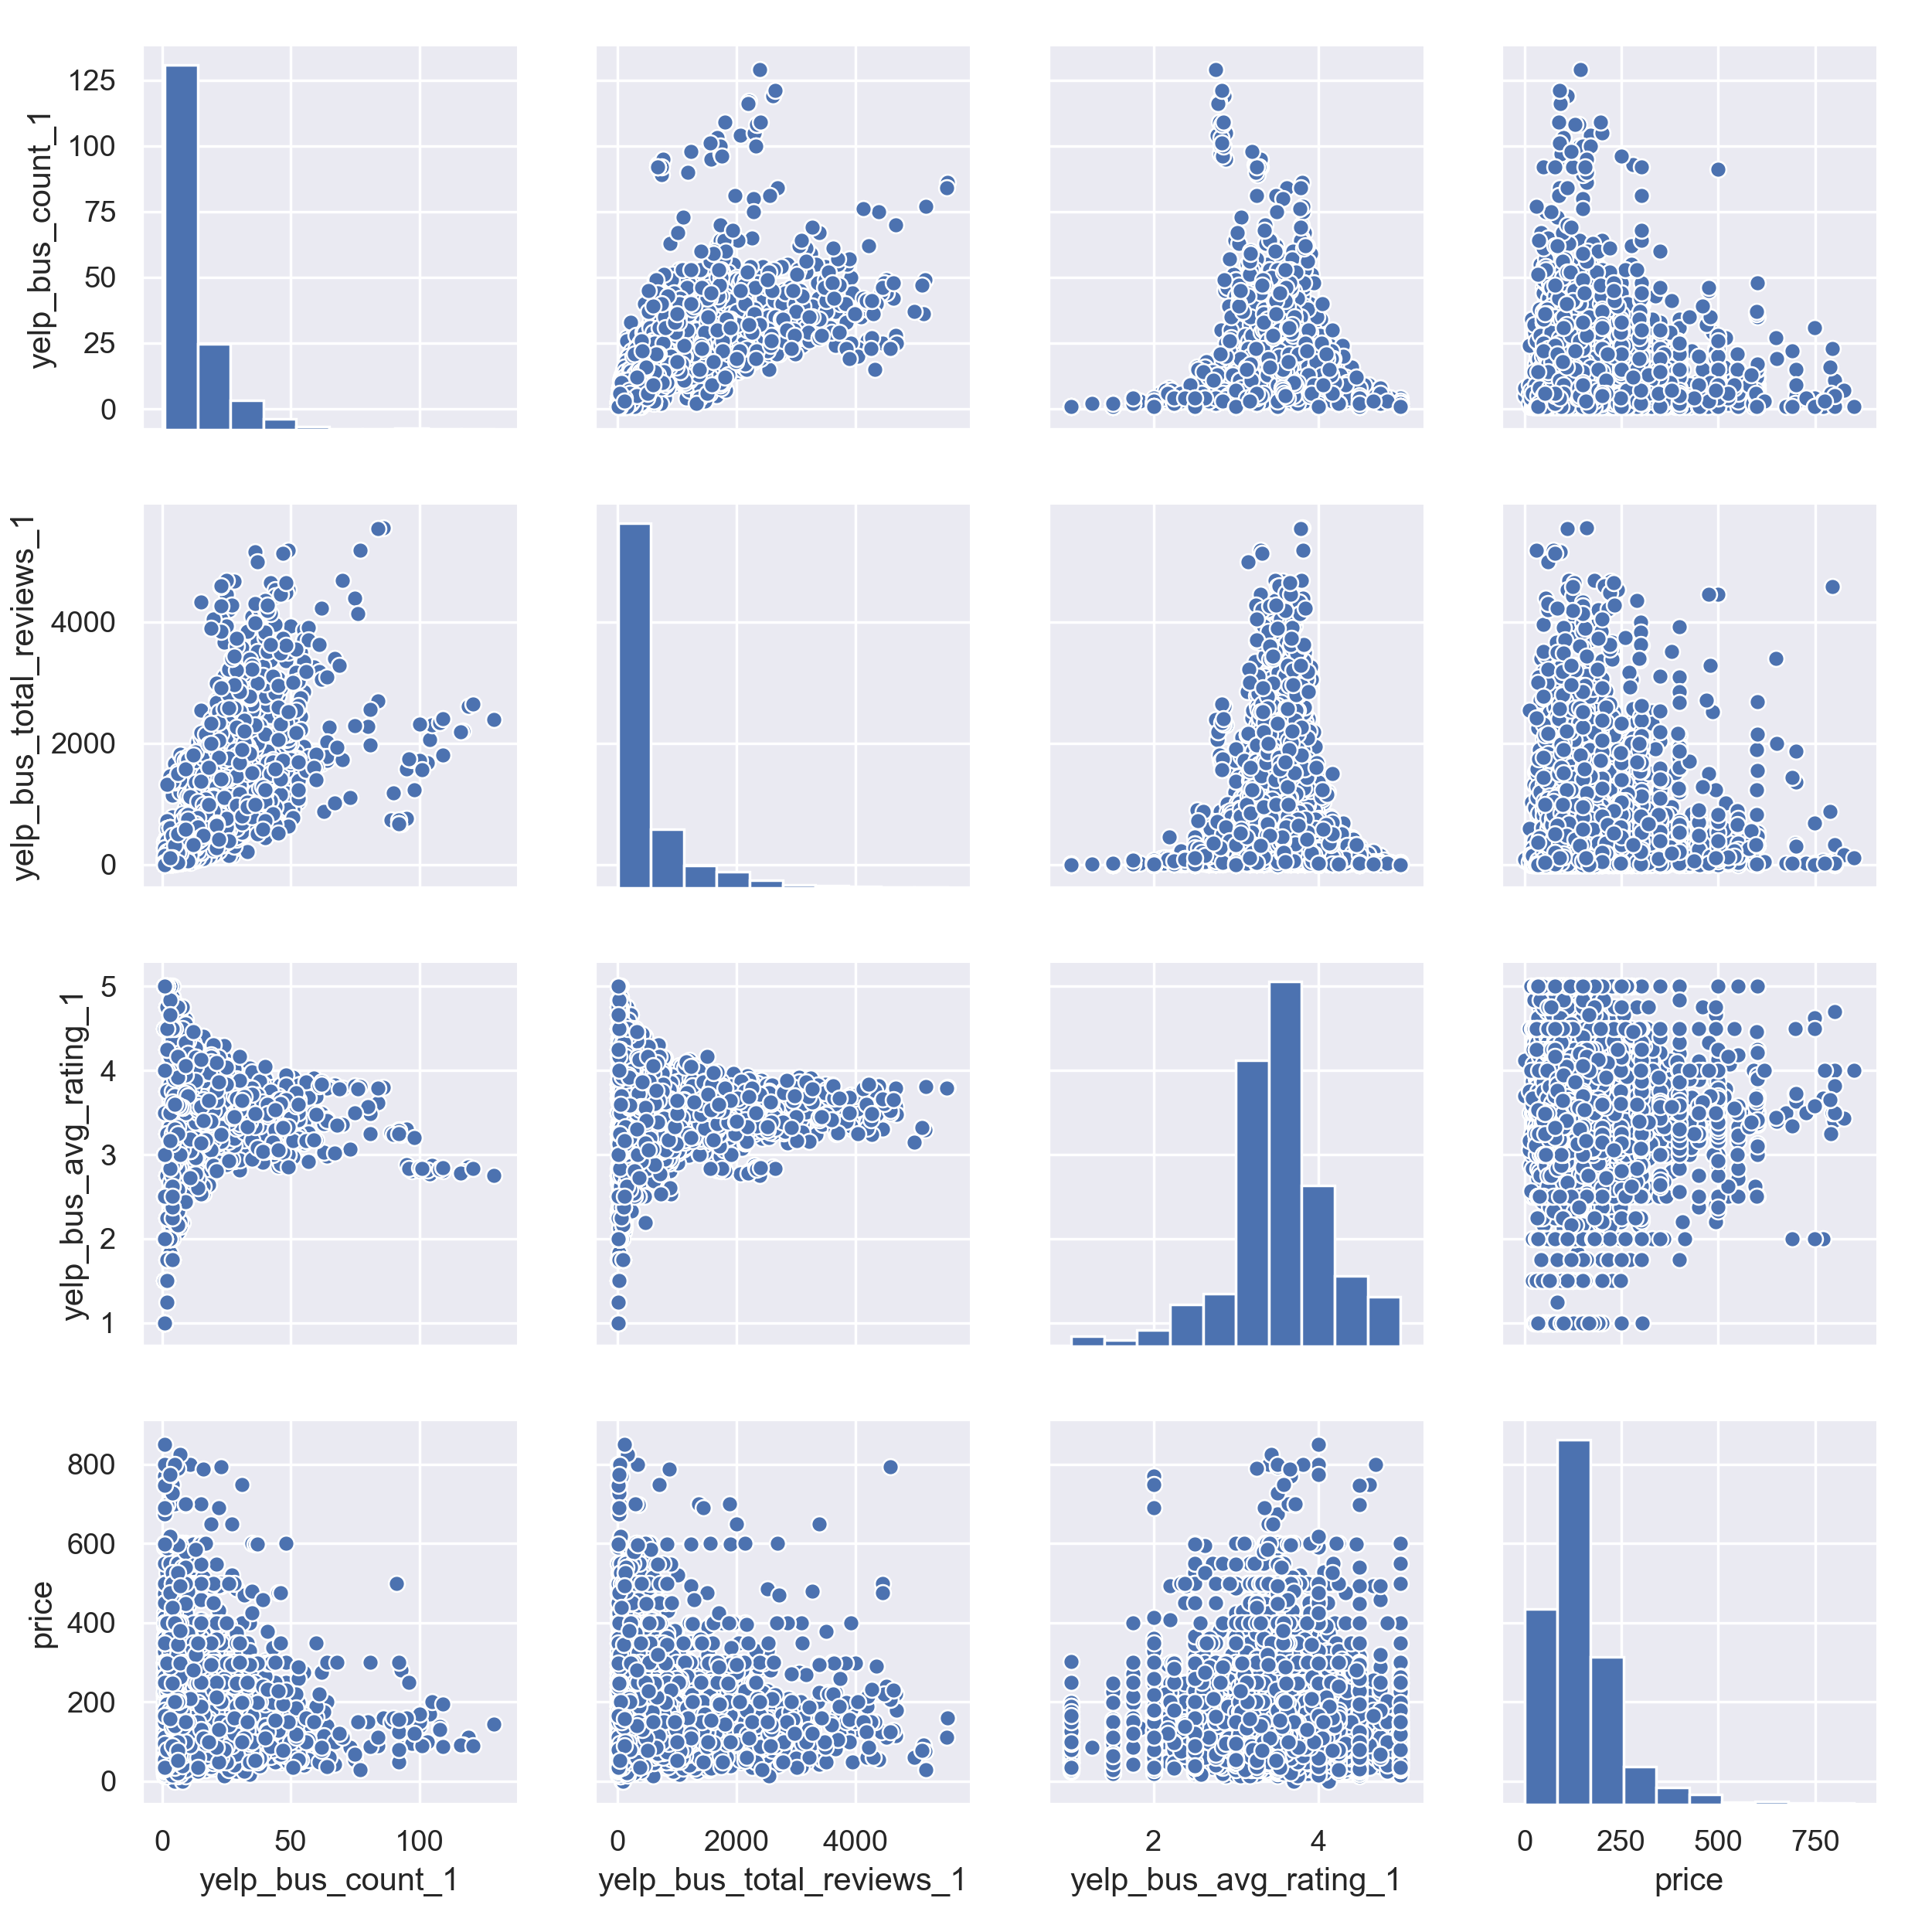

In [191]:
sns.pairplot(data=abb.dropna(), vars=['yelp_bus_count_1', 'yelp_bus_total_reviews_1', 'yelp_bus_avg_rating_1', 'price'])

<IPython.core.display.Javascript object>


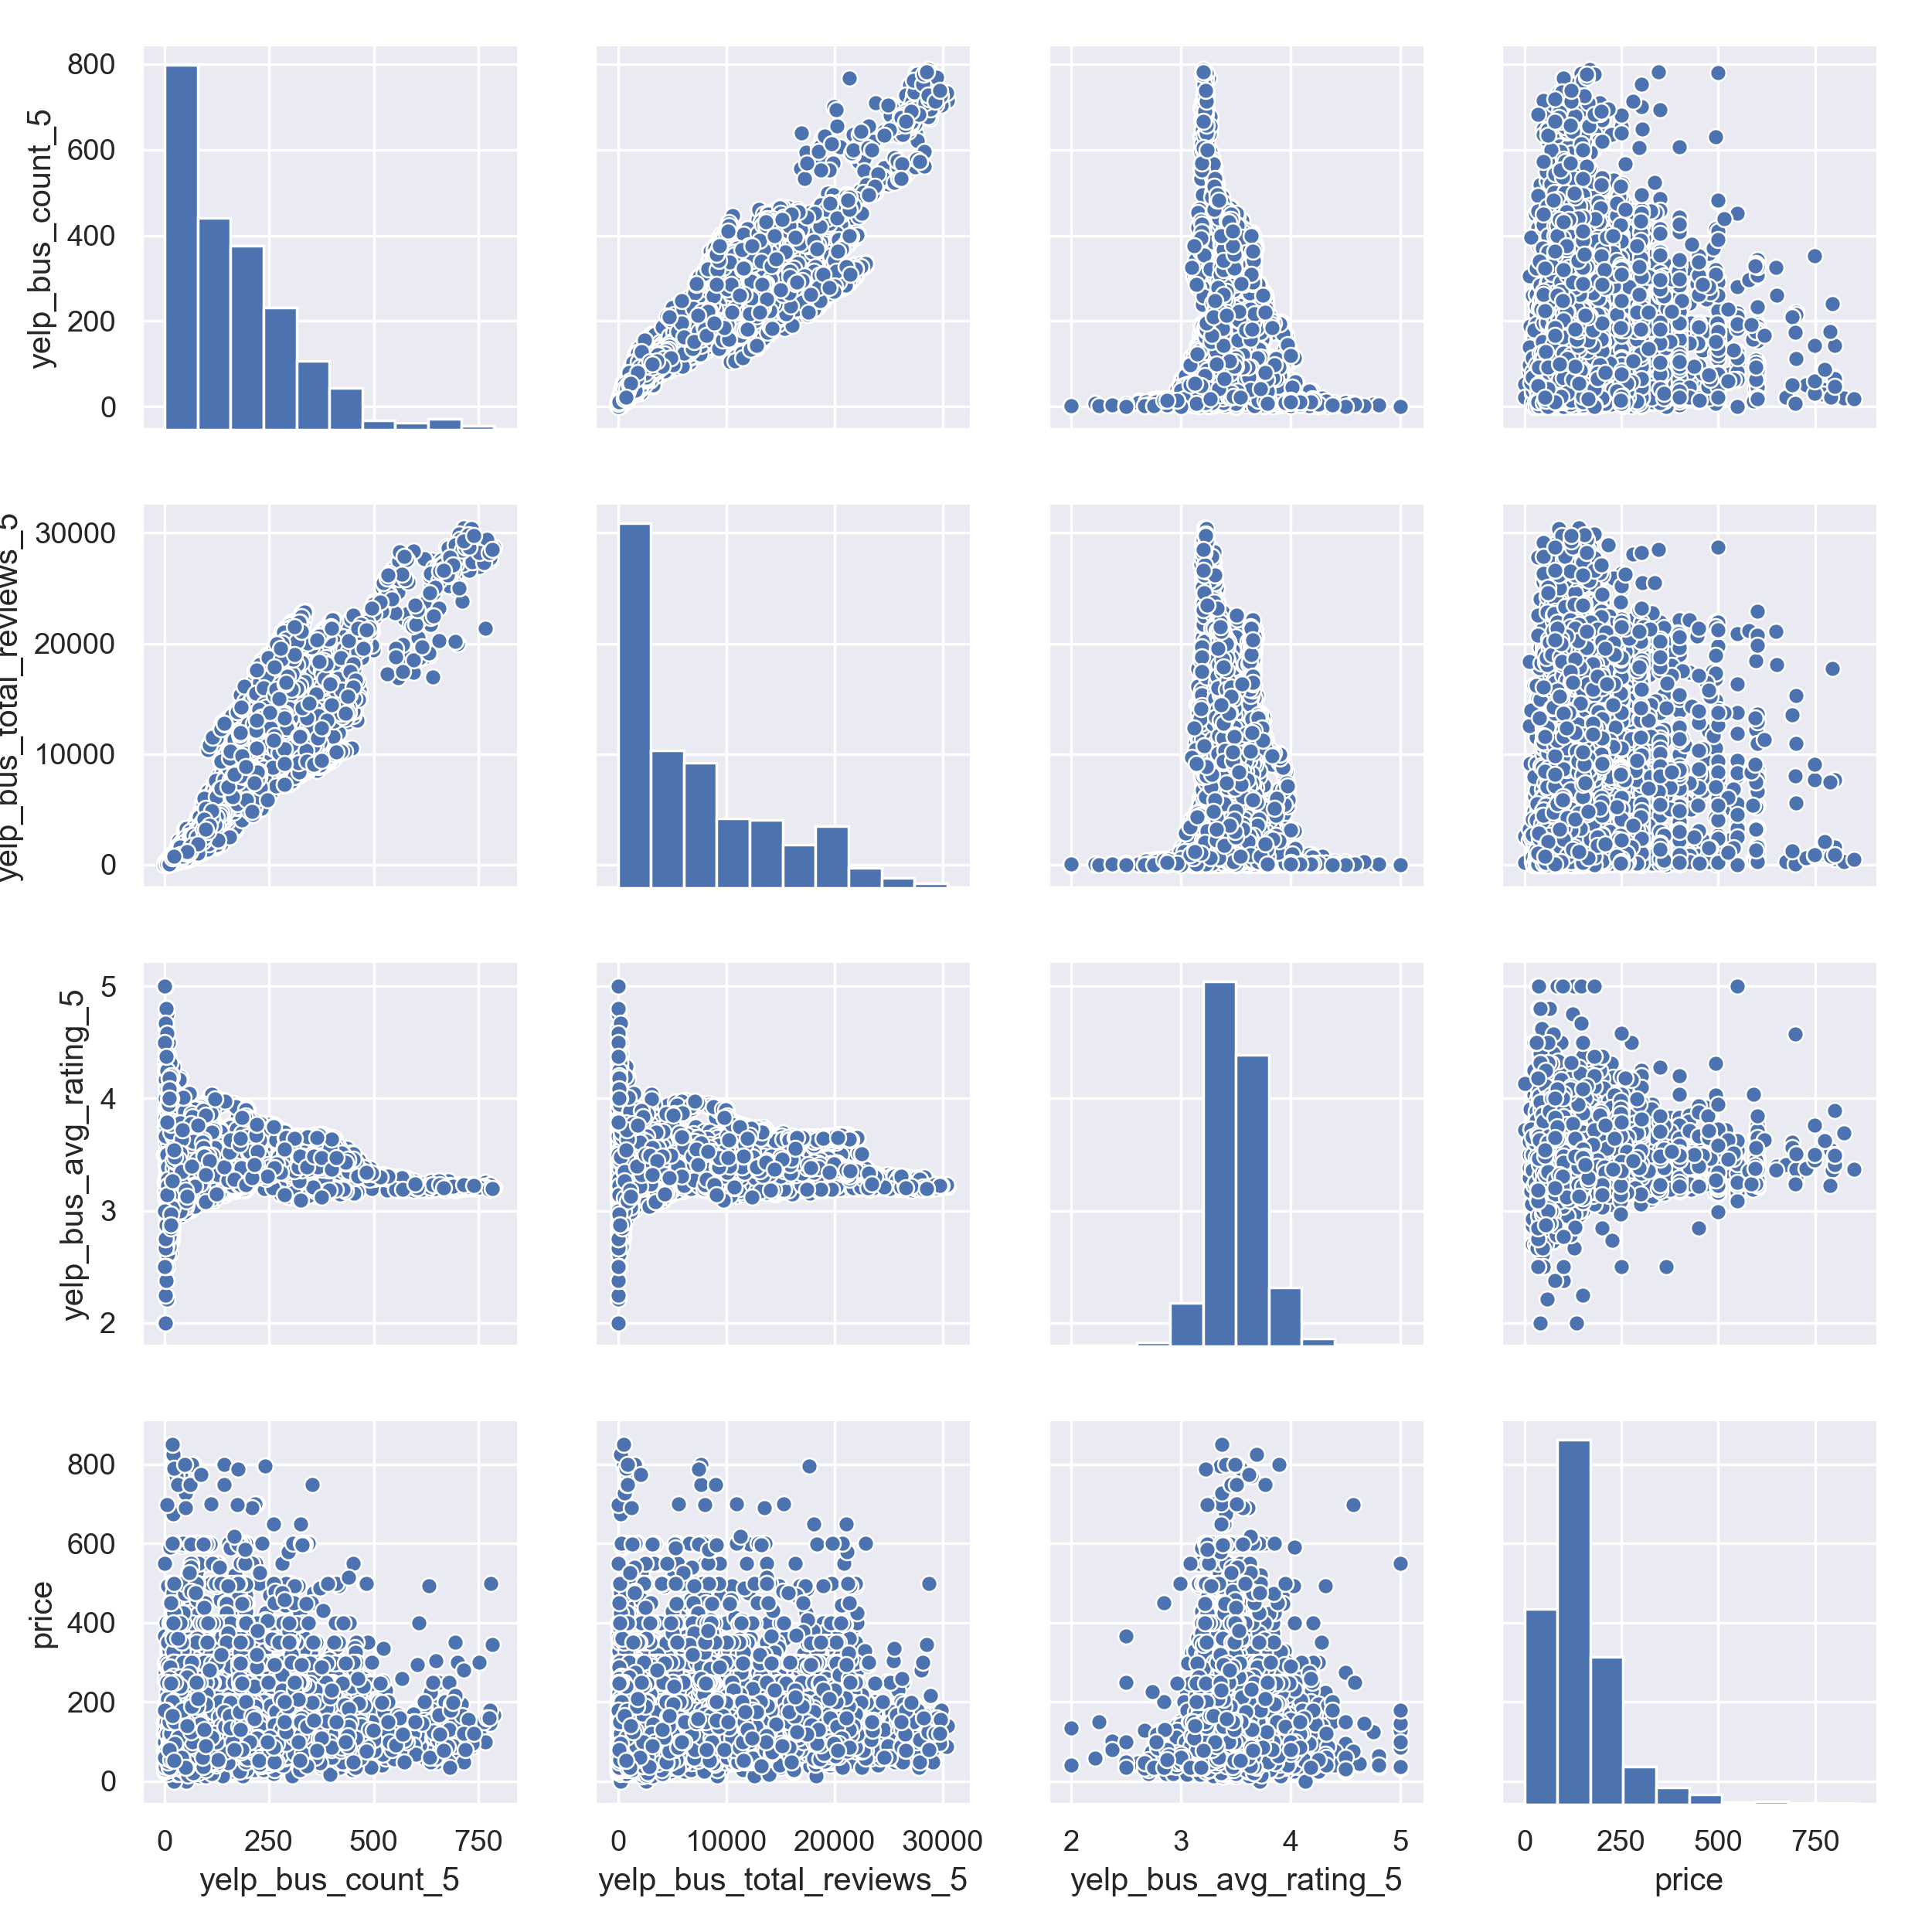

In [189]:
sns.pairplot(data=abb.dropna(), vars=['yelp_bus_count_5', 'yelp_bus_total_reviews_5', 'yelp_bus_avg_rating_5', 'price'])

### Map listing locations by price


In [19]:
#Make an empty map
#Play with location, zoom to find correct zoom on Toronto, and try diff tiles
#Look for a way to put price on color instead of radius

m = folium.Map(location=[43.6532, -79.3832], 
               tiles="Stamen Toner", 
               zoom_start=10, 
              )

#Add markers to map
for i in range(0, len(abb)):
    folium.Circle(
    location=[abb.iloc[i]['latitude'], abb.iloc[i]['longitude']],
    #popup=abb.iloc[i]['id'],
    #radius=abb.iloc[i]['price']/10,
    radius=20
    color='crimson',
    fill=True,
    fill_color='crimson'
    ).add_to(m)
    
m.save('mymap.html')